<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
       Protein Expression in Mice with Down Syndrome
    </h1></td>
    <td width="30%">
    <div style="text-align: right">
    <b> Homework Machine Learning 2020</b> 
    <br> Emanuel Michele Soda <br>
    <br> Matricola: 10753202 <br>
    <a href="emanuelmichele.soda@mail.polimi.it">emanuelmichele.soda@mail.polimi.it</a><br>
    </div>
    </td>
    <td width="111px"> 
        <a href="https://www.polimi.it">
        <img align="right", width="95px" src='https://labolfattometrico.chem.polimi.it/wp-content/uploads/2019/12/POLIMI-corretto-3-1024x1024.jpg' alt=''>
        </a>
    </td>
</tr>
</table>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from sklearn.feature_selection import SelectKBest   #ricordali di toglierli nel caso non servono 
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from function import *
np.random.seed(0)
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loding data and Data Preparation

The training dataset consists of the expression levels of 77 proteins of 367 mice. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

We first read the dataset and print the head to have a look of the data. 
In order to have a look to the dataset we can also print the info of the dataset. In this case we can see that there aren't missing values and all columns, except for the ***class*** column are float64. We can also see that the shape of our  *training dataset* is (367, 77), this means that our training dataset contrains  *367 samples* and *77 features*.

In [2]:
train = pd.read_csv("Data/train.csv")
print('Shape training set: ', train.shape)
train.head()
train.info()

Shape training set:  (367, 77)


DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.650511  1.158653  0.580172  2.230388  3.179675  0.533686  0.440101   
1  0.365907  0.651296  0.810468  2.597217  4.131603  0.537554  0.249235   
2  0.260145  0.397996  0.229522  2.643311  4.303648  0.268394  0.050916   
3  0.239489  0.271240  0.766816  1.872419  2.424971  0.322269  0.386791   
4  0.617112  0.751737  0.050685  2.356175  3.494138  0.506875  0.310644   

   pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N     pS6_N   pCFOS_N  \
0   5.033898  0.200985  1.589221  ...  0.047287  0.337121  0.203356  0.191360   
1   6.099538  0.226362  1.700578  ...  0.521112  0.419544  0.231619  0.393897   
2   3.130455  0.273792  2.534531  ...  0.047407  0.053130  0.096325  0.257402   
3   2.351832  0.034265  0.472725  ...  0.273651  0.162382  0.234056  0.180657   
4   3.855825  0.309879  1.033428  ...  0.172488  0.014086  0.191145  0.149622   

      SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N   class  
0  0.590874   0.112145  0.110109  0.160637  1.329248  t-CS-m  
1  0.252572   0.352687  0.085545  0.328537  1.008023  t-SC-s  
2  0.246015   0.203979  0.039188  0.008315  1.193634  c-SC-s  
3  0.351388   0.103896  0.302341  0.166020  0.689970  c-CS-m  
4  0.310434   0.151685  0.180055  0.383039  1.737274  t-CS-s  

[5 rows x 77 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         367 non-null    float64
 1   ITSN1_N          367 non-null    float64
 2   BDNF_N           367 non-null    float64
 3   NR1_N            367 non-null    float64
 4   NR2A_N           367 non-null    float64
 5   pAKT_N           367 non-null    float64
 6   pBRAF_N          367 non-null    float64
 7   pCAMKII_N        367 non-null    float64
 8   pCREB_N          367 non-null    float64
 9   pELK_N           367 non-null    float64
 10  pERK_N           367 non-null    float64
 11  pJNK_N           367 non-null    float64
 12  PKCA_N           367 non-null    float64
 13  pMEK_N           367 non-null    float64
 14  pNR1_N           367 non-null    float64
 15  pNR2A_N          367 non-null    float64
 16  pNR2B_N          367 non-null    float64
 17  pPKCAB_N        

## Preliminary Analysis 

### Data plots
The first thing that we could do in order to have an idea of our dataset is to plot the data. For example we can have a look to the number of mice divided according to their genotype. As so we can see that the number of *Trisomic* mice is greater with respect to the *Control* ones. So our dataset is not balance between this two group of data.

We can also plot the number of samples divided in 8 classes that are the following
* c-CS-s : control mice, stimulated to learn, injected with saline
* c-CS-m : control mice, stimulated to learn, injected with memantine
* c-SC-s : control mice, not stimulated to learn, injected with saline
* c-SC-m : control mice, not stimulated to learn, injected with memantine
* t-CS-s : trisomy mice, stimulated to learn, injected with saline
* t-CS-m : trisomy mice, stimulated to learn, injected with memantine
* t-SC-s : trisomy mice, not stimulated to learn, injected with saline
* t-SC-m : trisomy mice, not stimulated to learn, injected with memantine


As we can see the lowest number of sample is from the c-CS-m class. This could lead to missclassificatioon of this class due to the fact that our classifier will not have so much example to learn from.

Number of trisomic mouse is 210 that is the 57% of the training set
Number of trisomic mouse is 157 that is the 43% of the training set


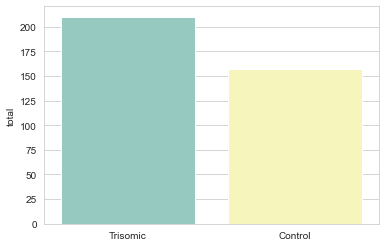

In [3]:
#plotting the number of mouse divided in 'control' and 'trisomy'
trisomic = train['class'].str.contains("t-")
control = train['class'].str.contains("c-")

tot_trisomic = sum(trisomic)
tot_control = sum(control)
print('Number of trisomic mouse is', tot_trisomic, 
      'that is the {0:.0f}%'.format(100*tot_trisomic/train.shape[0]),'of the training set')
print('Number of trisomic mouse is', tot_control, 
      'that is the {0:.0f}%'.format(100*tot_control/train.shape[0]),'of the training set')

trisomic_vs_control = pd.DataFrame({'Trisomic':[tot_trisomic], 'Control':[tot_control]}, index = ['total']).T
_ = sns.barplot(x = ['Trisomic', 'Control'], y = "total", data = trisomic_vs_control, palette="Set3")

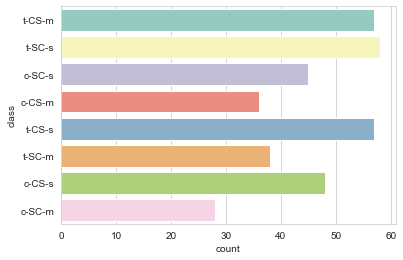

In [4]:
# number of samples the 8 classes
_ = sns.countplot(y = "class", data = train, palette = "Set3")

## Class Labels

In order to use machine learning algorithm we have to encode our categorical data in numerical data. This can be done using different tecnique (e.g. one-hot encoding and label encoding), here we will use the label encoding tecnique that just assign an increasing number to the classes. So in our case this tecnique will assign a number from 0 to 7 to our 8 classes. This is done using the *LabelEncoder()* function in sklearn. 

Note: assigning a progressive number to the class could lead to some problems, for example a machine learning algorithm could think that the class labeled with a 3 is "greater" than a class labeled with a 1. Anyway this seems to do not have impact in our particular cases, so we will use this procedure to keep things simple.

For this reasons we will use the one-hot encoding just to visualize the correlation between the features and the 8 classes.

As we said the number of features is to high to visualize them using a pairplot. We can instead, plotting the correlation matrix.
As we can see using from the correlation matrix below the features show a moderate correlation.

Plotting the correlation with the classes we can see that only few features do an ok job in discriminate the classes. For example we can see that MTOR tends to be slight lower expressed in a class with respect to the other.

The most important thing that we can understand looking to those plots is that not a single protein expression is able to discriminate the 8 classes. For this reason the features space of out classification problem will be certainly greater than one.


In [5]:
labelClass = train['class'] 
le = preprocessing.LabelEncoder()
codedLabel = le.fit_transform(labelClass)
train['class']  = le.fit_transform(train['class'])

In [6]:
dummies = pd.get_dummies(train['class'], prefix = 'class') 
train_corr = pd.concat([train, dummies], axis = 1)
train_corr.drop('class', axis = 1, inplace = True)

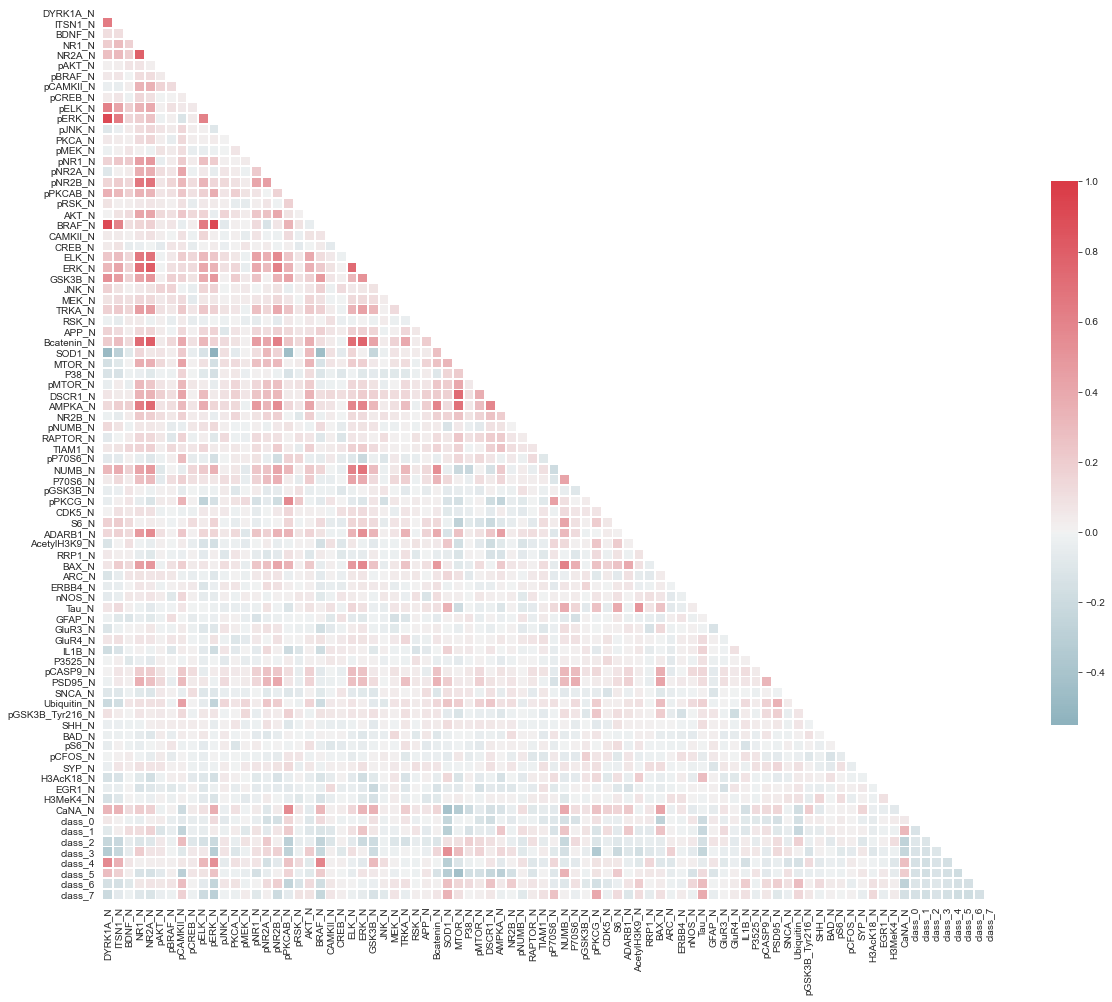

In [7]:
corrMat = train_corr.corr()
visualizeCorrMat(corrMat)

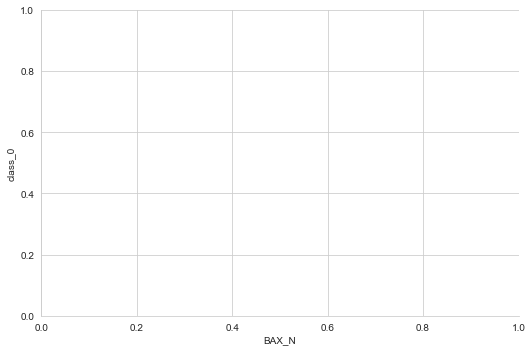

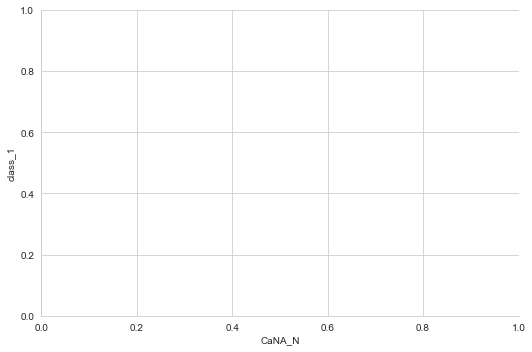

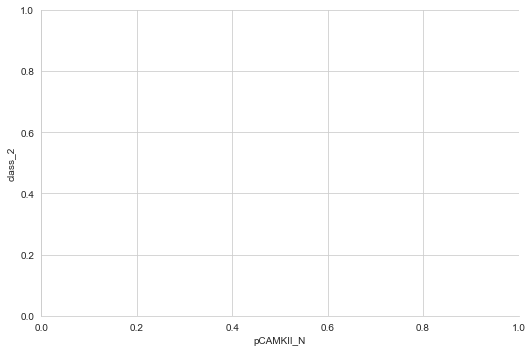

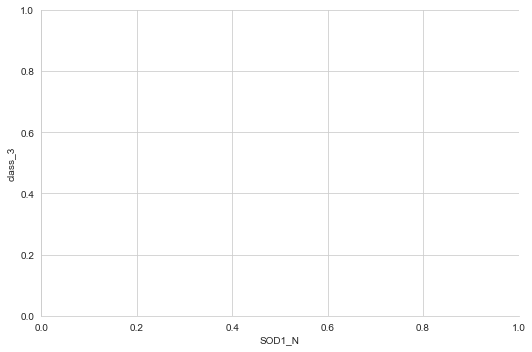

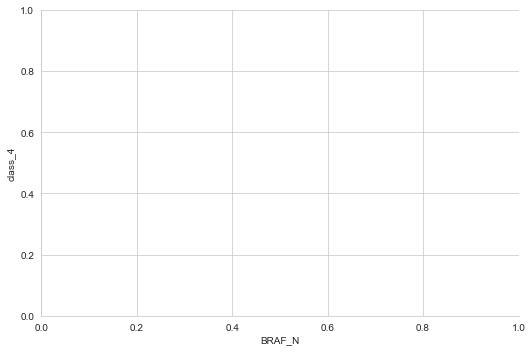

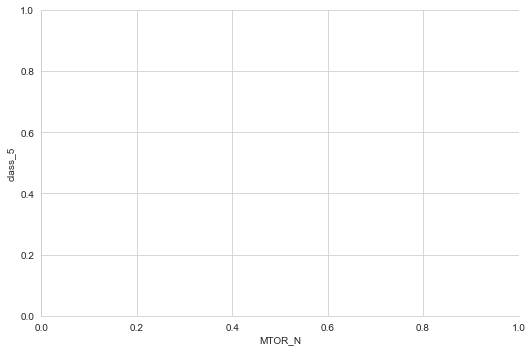

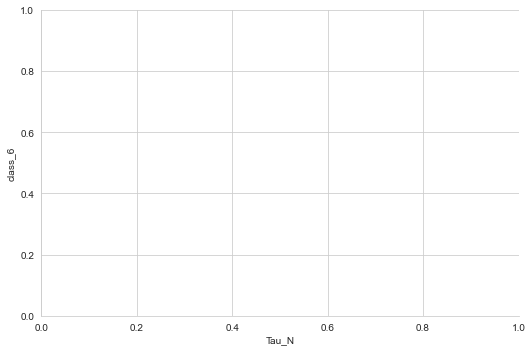

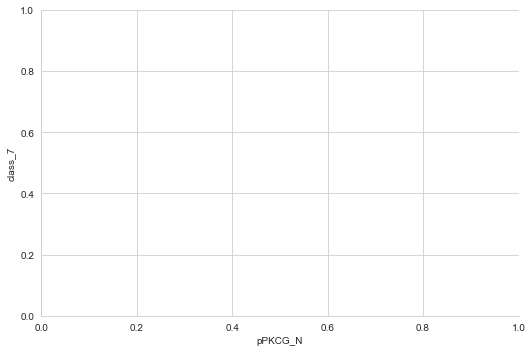

In [8]:
for item in dummies.columns:
    cor_target = abs(corrMat[item]).drop(item)   
    visualizeCorTarget(cor_target, cor_target.max(), train_corr, item)  

In [9]:
# we drop the target class
train.drop(columns = 'class', inplace = True)
features_SOD1_N = train.pop('SOD1_N')

## Variance visualizzation and normalizzation
It is always a good practice to analyze the variance of our features in order to understand if our data needs normalization. In particular in our dataset most of the features have  low variance and other have very high variance, an example is Tau. So in ordert to have all features in the same range we performe a normalizzation using the following formula:
 
\begin{equation} \label{eq:normalization}
    z = \frac{(x_{i} - \mu) }{\sigma}
\end{equation}

We can do this using the *StandardScaler()* function in the *scikit-learn* **API**.
The normalizzation will speed up our machine learning algorithm and makes our predictions more accurate giving alle features the same weight. 

Max Variance value :	 1.926769317467468
Min Variance value :	 0.00040275706051909544
Mean Variance value:	 0.09757634594471151


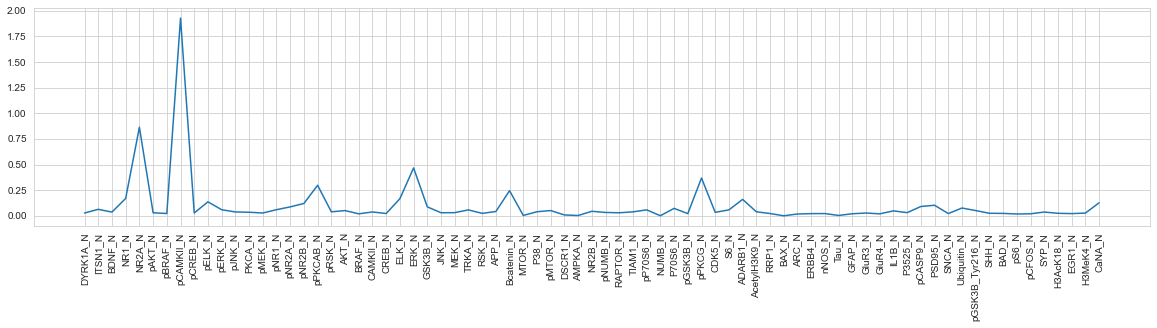

In [10]:
varianceVisualization(train)

Max Variance value :	 1.0027322404371597
Min Variance value :	 1.0027322404371575
Mean Variance value:	 1.0027322404371581


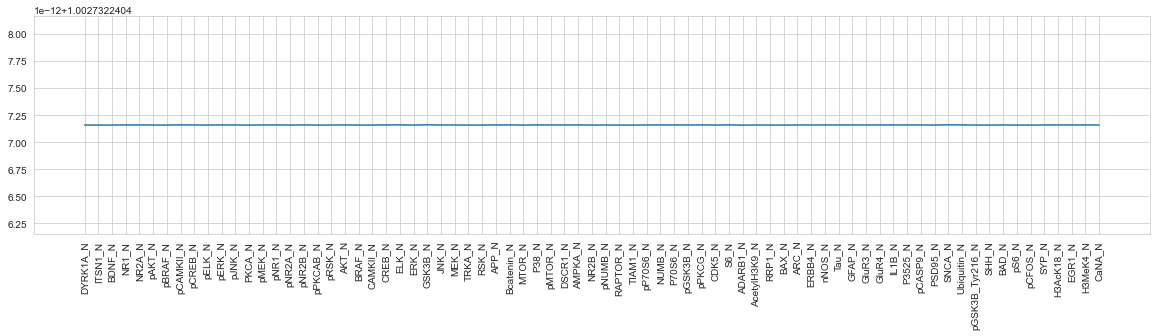

In [11]:
standard_scaler = preprocessing.StandardScaler().fit(train)
train = pd.DataFrame(standard_scaler.transform(train), columns = train.columns)
varianceVisualization(train)

### Principal component  
We can visualize the principal components to have a look of the number of dimensions we need to separate our data, to do so we have to calculate the principal components and the percentage of variance expressed by each components. We can now visualize the percentage of variance expressed by each component with a plot.

Using this plot we can see that the percentage of variance expressed by each principal component is not so much and only with 48 principal components we reach a cumulative variance expressed equal to the 90%. 

We can use the principal component to plot the data in a 3D space using the first 3 principal components. As we said above using only 3 principal components our data will not be very separeted but we can use them to have an idea of the shape of our data in the features space. 

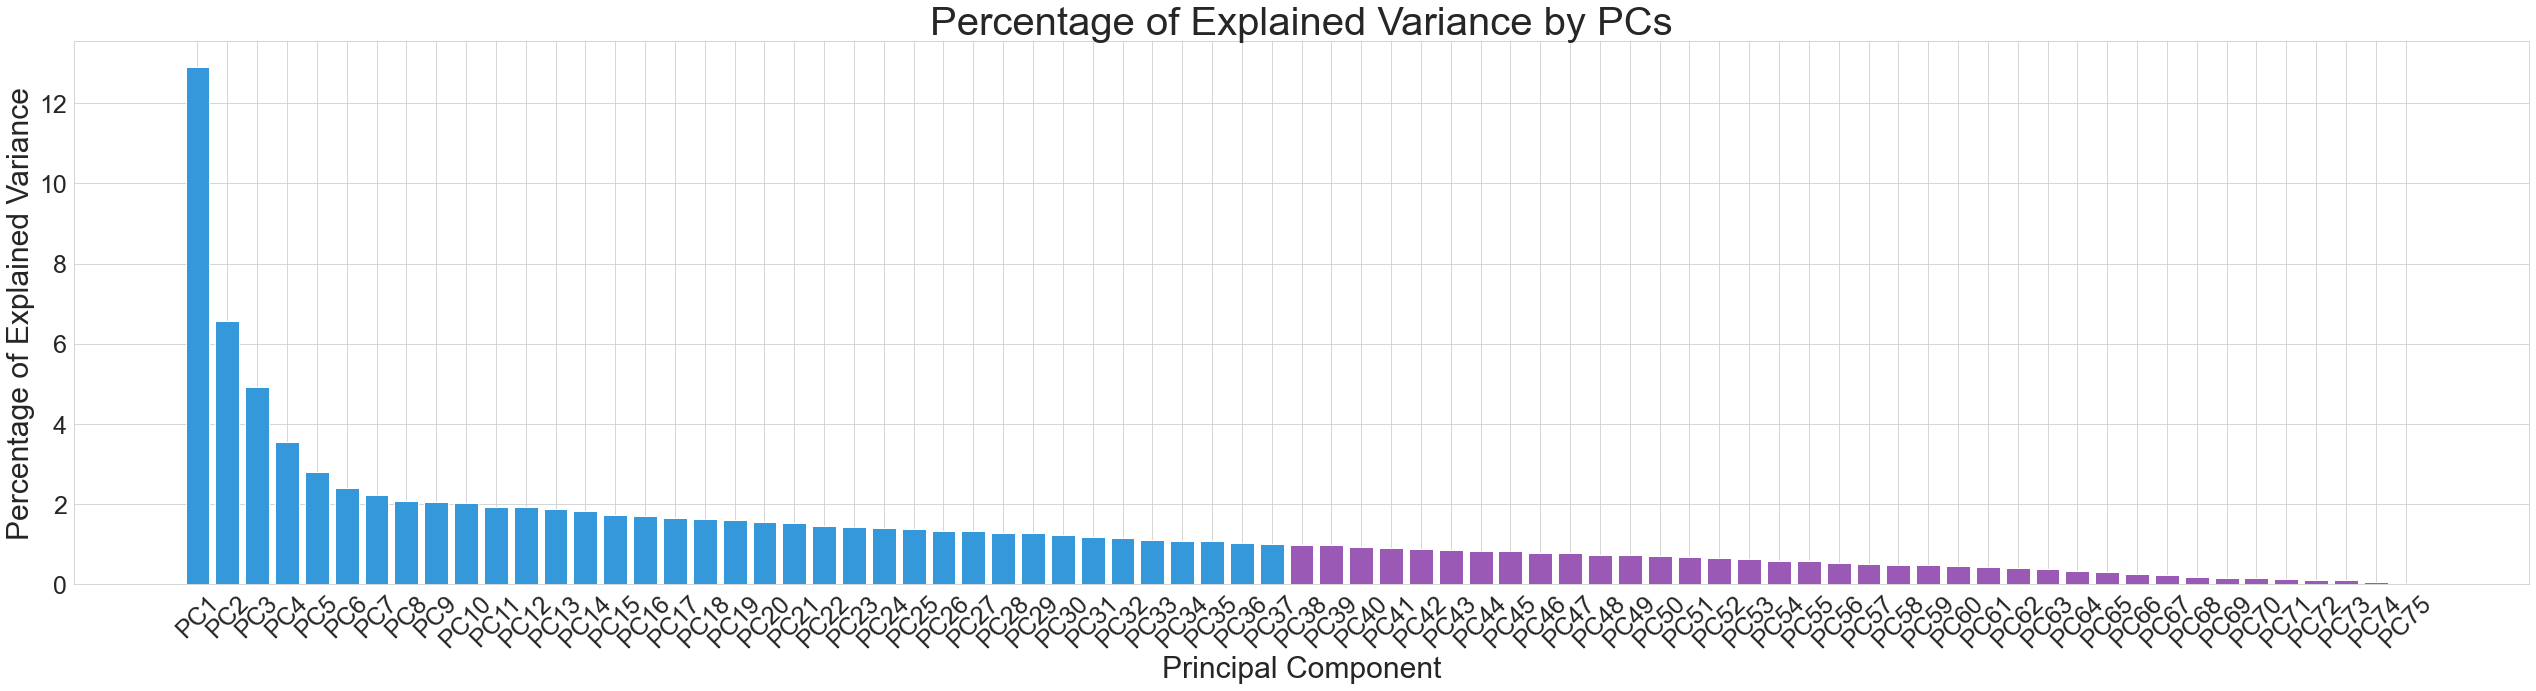

In [12]:
principalComp, per_var, singular_values = principalComponent(train, train.shape[1])
plot_labels = visualizeComponentVariance(per_var, 'Percentage of Explained Variance', 
                                         'Percentage of Explained Variance by PCs', per_var = per_var)

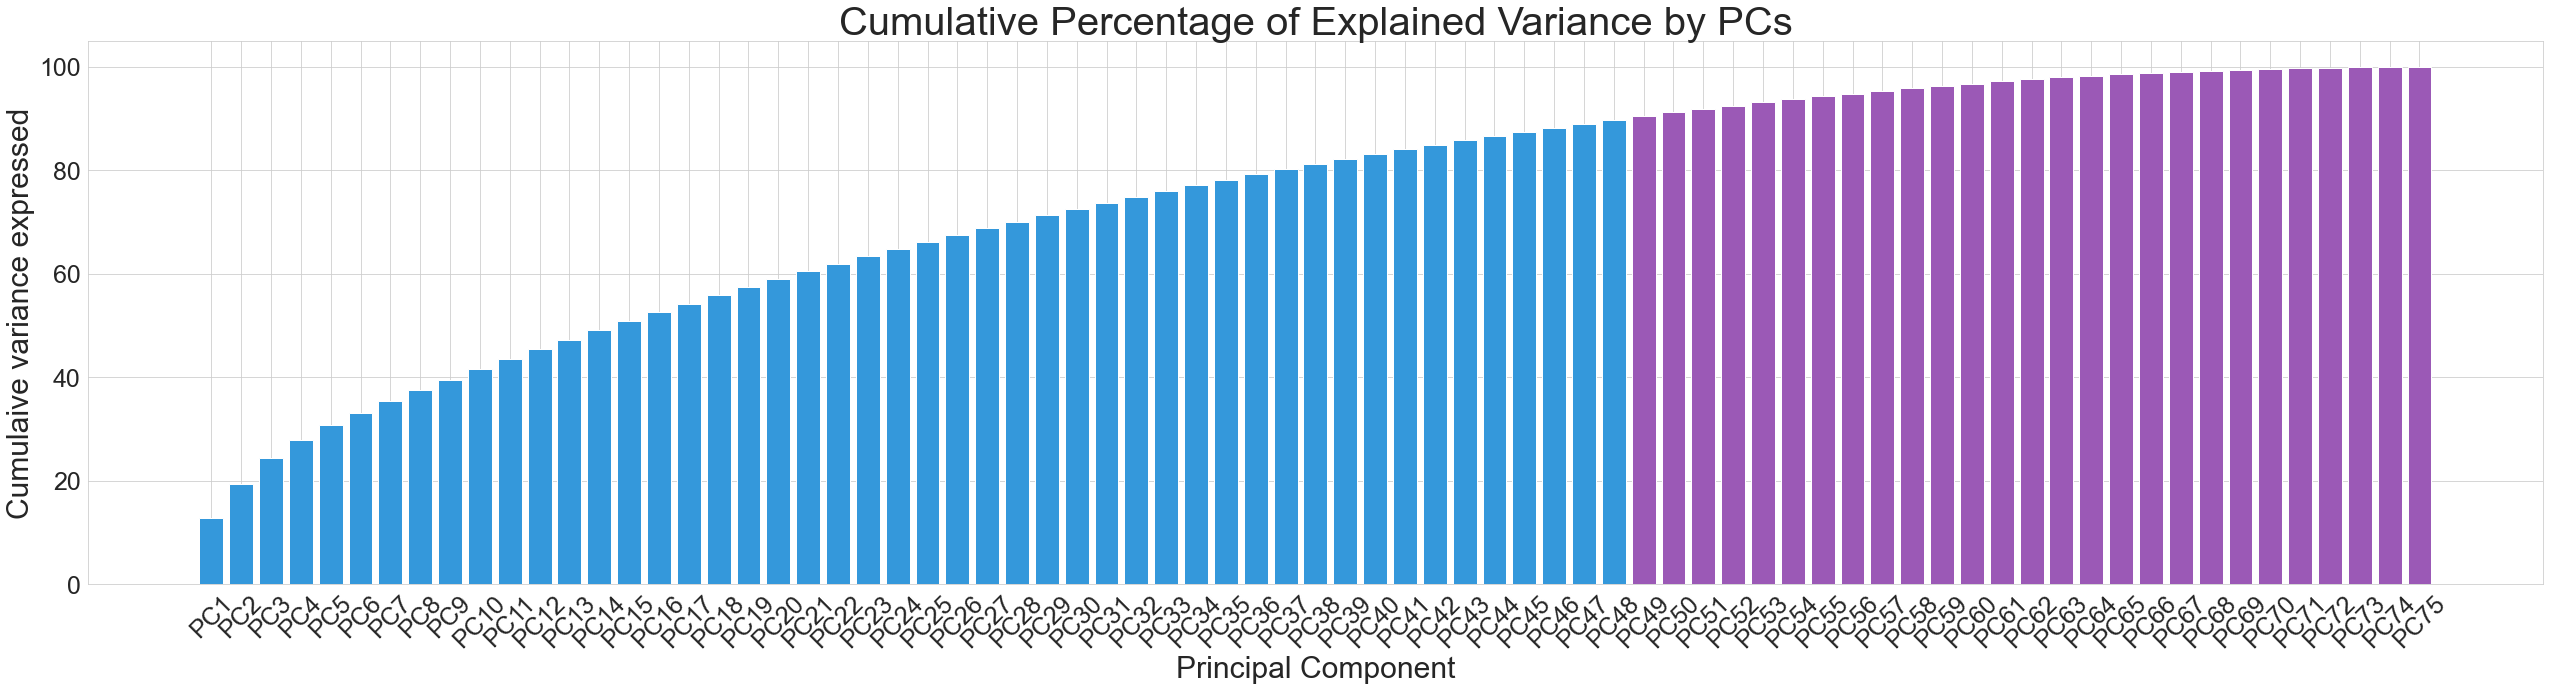

In [13]:
_ = visualizeComponentVariance(per_var.cumsum(), 'Cumulaive variance expressed', 
                           'Cumulative Percentage of Explained Variance by PCs', cum = True)

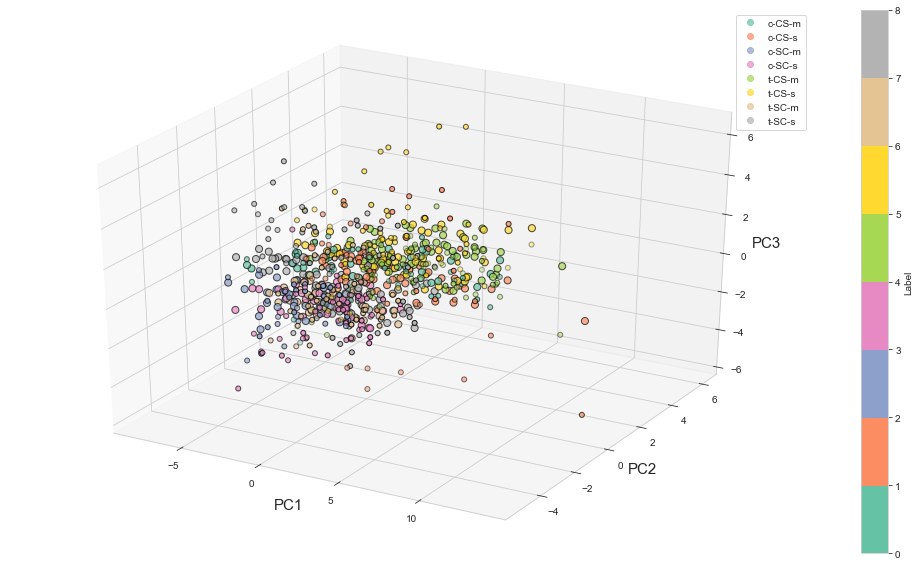

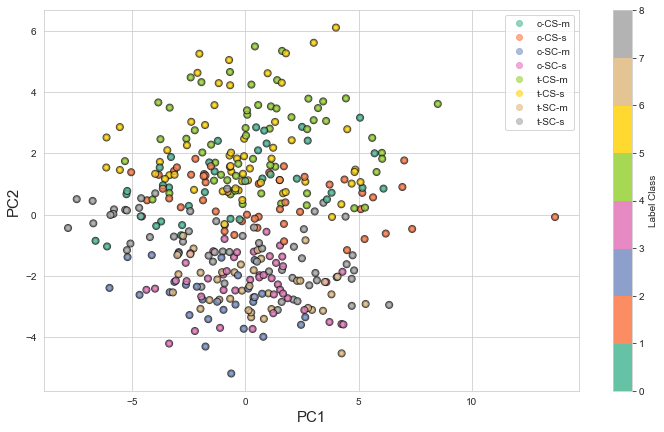

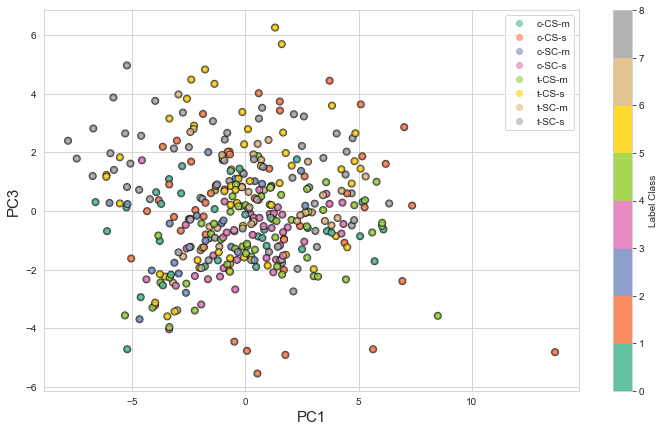

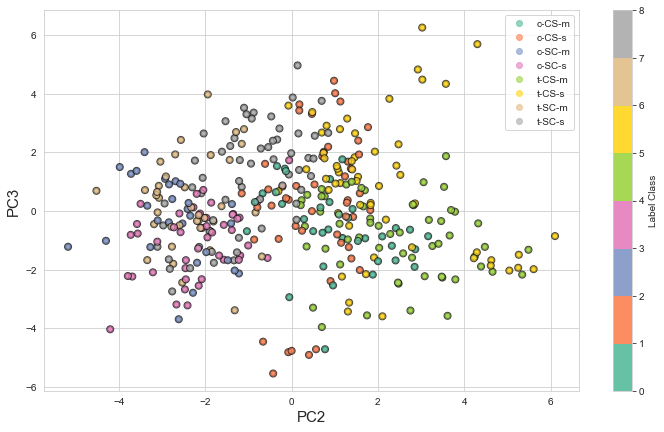

In [14]:
pc_plot, _, _ = principalComponent(train, 3)
pc_plot = pd.DataFrame(pc_plot, columns = plot_labels[0 : 3])

plotPCA(codedLabel, pc_plot)
plot2dPCA(codedLabel, pc_plot.PC1, pc_plot.PC2)
plot2dPCA(codedLabel, pc_plot.PC1, pc_plot.PC3)
plot2dPCA(codedLabel, pc_plot.PC2, pc_plot.PC3)

## Clustering
We are now going to look if our data naturally aggregate in some groups. We are going to use different clustering algorithm in particular we are going to use one clustering algorithm for typology:
* K-means for the partitioning clustering
* DBSCAN for the density based cluster
* Bottom up approch for the Hierarchical Clustering

Regarding the k-means to choose the "right" number of cluster we plot the WWS, the BSS and the Silhuette score and then we use the Elbow method to choose the best number of cluster. 
* The WWS mesures the Cohesion and has the following formula: 

\begin{equation} \label{eq:WSS}
  WSS = \sum\limits_{k} \sum\limits_{x_{n} \in C_{k}}  (x_{n} - c_{k})^2
\end{equation}

where: 
    $x_{n}$ is a point in the cluster *k* and $c_{k}$ is the centroid of the cluster
* The BSS mesures the Separation and has the following formula:

\begin{equation} \label{eq:BSS}
  WSS = \sum\limits_{k} |C_{k}|(\bar{c} - c_{k})^2 
\end{equation}
where: $|C_{k}|$ is the size of the cluster and $\bar{c}$ is the mean of all the centroids

* The Silhuette combines the two ideas and has the following formula: 

if a < b: 
\begin{equation} \label{eq:Silhuette1}
  s(x_{n}) = 1 - \frac{a}{b} 
\end{equation}
else:  
\begin{equation} \label{eq:Silhuette2}
  s(x_{n}) = \frac{b}{a} - 1 
\end{equation}

where: a is the everage distance of $x_{n}$ to the poins in its clusters, b is the minimun of the average distance of $x_{n}$ to the points in another cluster

To have an a mesurement of the "goodness" of our clustering we use the *purity* of a clustering to see if one class belong only to one cluster and has the following formula: 

\begin{equation} \label{eq:purity}
  p = \sum\limits_{k = 1}^K \frac{N_{k}}{N} p_{k}
\end{equation}


where: $p_{k}$  is the purity of the cluster *k*, $N_{k}$ is the number of element in the cluster *k* and *N*  is the total number of elements to be clustered.

In particular for our dataset the k-means finds 2 clusters and so the clusters contains different class and for this reason have low purity. But this clusters contains sample of all the class, so even if data naturally aggregates in two clusters this is not a good clustering even though as we can easily see in the plot the data belonging to the same cluster are close, so the correlation is quite high. 

The clustering using the DBSCAN algorithm give us completely wrong results even with the use of KNN to first campute the min_samples, and  this could be due to the very different density in the data. And even optimizing the hyperparameters the result does not improve.


For the clustering using the hierarchical clustering we first plot the dendogram and as we can see the linkage that give us the best results is the complete and this maybe because our dataset contains outliers and as we know complete linkage is quite robust to outliers.
If we plot the WSS, the BSS and the Silhuette we obtain the same results that we have seen with the k-means. 

So just for the sake of curiosity we keep the 8 clusters division (same number of the classes in our dataset). In particular we can notice that the clusters yellow tends to group together mice belonging to c-SC-m, c-SC-s and t-SC-m, that are all mice that are not stimulated to learn, and this is perfectly reasonable because maybe the difference in proteine expressions for sample belonging in c-SC-m and c-SC-s that are both classes with control mice are similar and this is not too strange, while the protein expressions for samples that are trisomy mice but are not stimulated to learn even thought injectet with mementine could be not so different due to the fact that differences could arise only when trisonomy mice are stimulated to learn. Similar reasonings could be done for all the other classes.


In the end the clustering performed could not be used for unsupervised prediction but has give us some ideas on the problem that we could meet while performing the classification and for example the problem of incorrectly classify sample belonging to those three classes c-SC-m, c-SC-s and t-SC-m which seem to be very close in the features space.

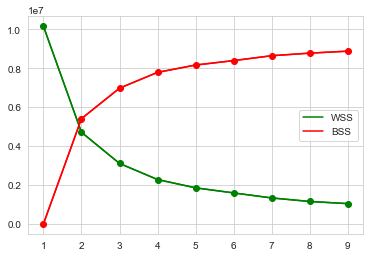

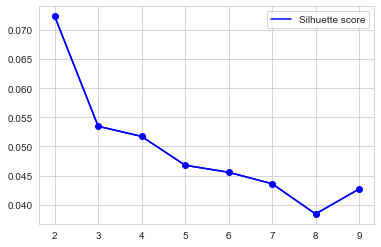

In [15]:
#KMEANS
clus_list = list(range(1, 10))    
models_KM = []
for i in clus_list:
    models_KM.append(KMeans(n_clusters = i, init = 'k-means++' , algorithm = "full", max_iter = 300, random_state = 42))
 
plotMetrics(principalComp, models_KM)

Silhouette_score:  0.0725402248436811
correlation: 0.7317868000407292
Purity:  0.17166212533129102


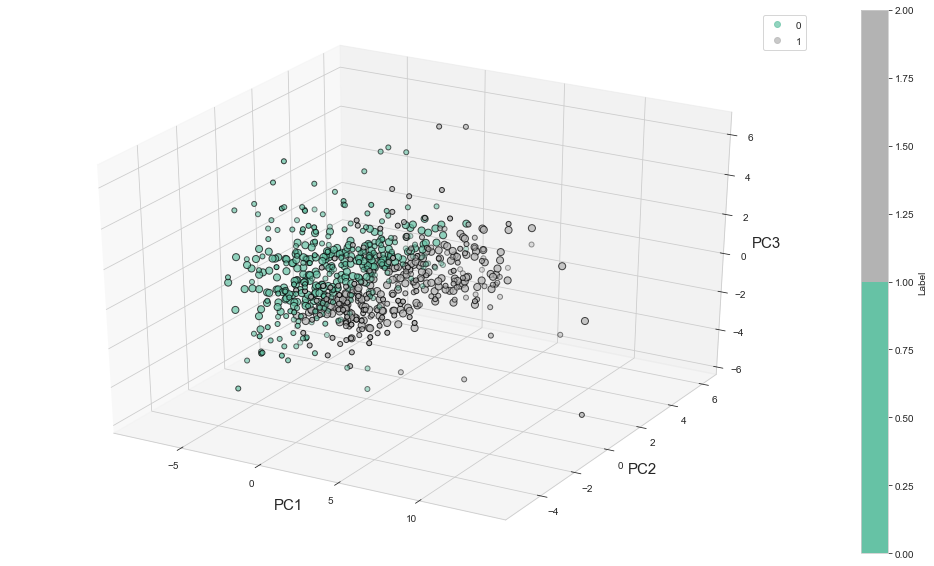

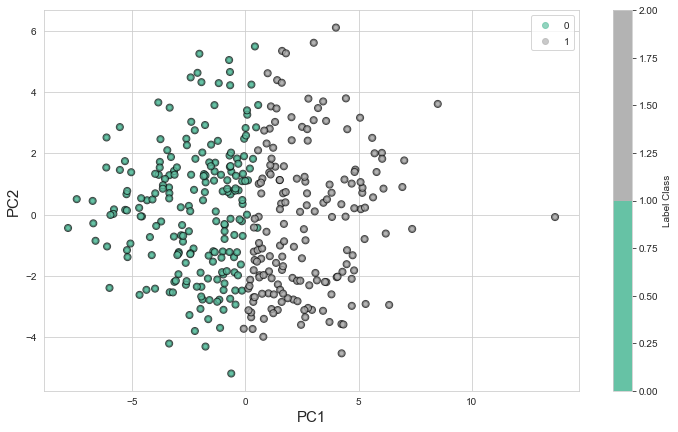

In [16]:
# according to the silhouette the best k = 2
k = 2
kmeans = KMeans(n_clusters = k, init = 'k-means++', algorithm="elkan", max_iter=100, n_init= 100)


print("Silhouette_score: ", silhouette_score(principalComp, 
                                             kmeans.fit_predict(principalComp), metric = 'euclidean'))
plotPCA(kmeans.fit_predict(principalComp), pc_plot, clustering = True)
plot2dPCA(kmeans.fit_predict(principalComp), pc_plot.PC1, pc_plot.PC2, clustering = True)
print('correlation:', correlation(principalComp, kmeans.fit_predict(principalComp), 'euclidean'))
print('Purity: ', tot_purity(kmeans.fit_predict(principalComp), codedLabel))


DBSCAN(eps=4, min_samples=1)

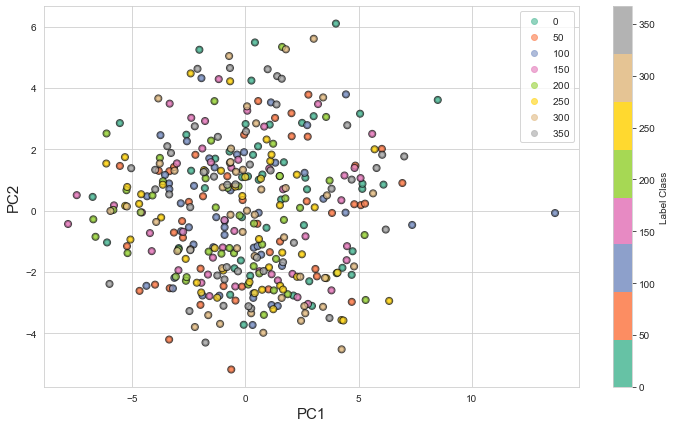

In [17]:
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 4, min_samples = 1)
dbscan.fit(principalComp)
y_predict_dbscan = dbscan.fit_predict(principalComp)
plot2dPCA(y_predict_dbscan, pc_plot.PC1, pc_plot.PC2, clustering = True)

In [18]:
leaf_size = list(range(1, 100))
n_neighbors = list(range(1, 300))
p = [1, 2]
algorithm = ['ball_tree', 'kd_tree', 'brute']

hyperparameters = dict(n_neighbors = n_neighbors, p = p, algorithm = algorithm)
knn_2 = KNeighborsClassifier()

clf = GridSearchCV(estimator =  knn_2, param_grid = hyperparameters, cv = 10, n_jobs =-1)

best_model = clf.fit(principalComp,codedLabel)
bestKnn =  best_model.best_estimator_
print('Best leaf_size:', bestKnn.get_params())

Best leaf_size: {'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 29, 'p': 1, 'weights': 'uniform'}


Text(0.5, 0, 'Points sorted according to the 29th NN Distance')

Text(0, 0.5, '29th NN Distance')

The labels are:	 {0}
Purity:  0.15803814713465836


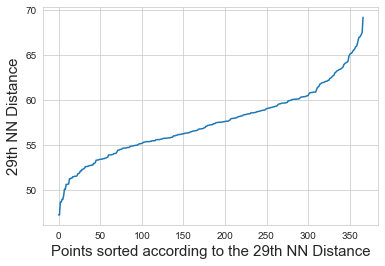

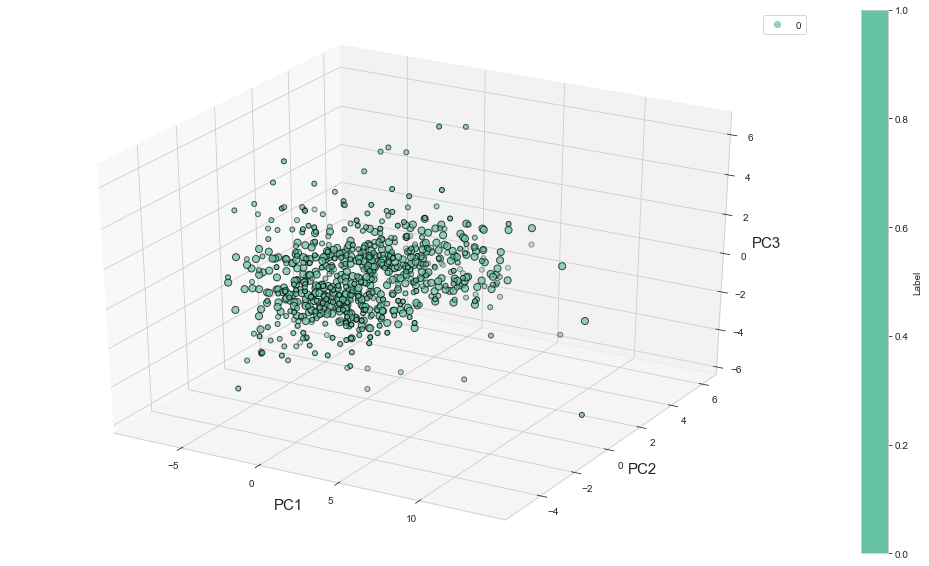

In [19]:
neigh = NearestNeighbors(n_neighbors = bestKnn.n_neighbors, leaf_size = bestKnn.leaf_size, p = bestKnn.p)
nbrs = neigh.fit(principalComp)


distances, _ = nbrs.kneighbors(principalComp)
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.plot(distances)

plt.xlabel('Points sorted according to the ' + str(bestKnn.n_neighbors) +'th NN Distance', size = 15)
plt.ylabel(str(bestKnn.n_neighbors) +'th NN Distance' , size = 15)
#eps = 1.748428908
m = DBSCAN(eps = 63 , min_samples =  bestKnn.n_neighbors).fit(principalComp)
print("The labels are:\t", set(m.labels_))

print('Purity: ', tot_purity(m.labels_, codedLabel))

plotPCA(m.labels_, pc_plot, clustering = True)

Text(0.5, 1.0, 'single')

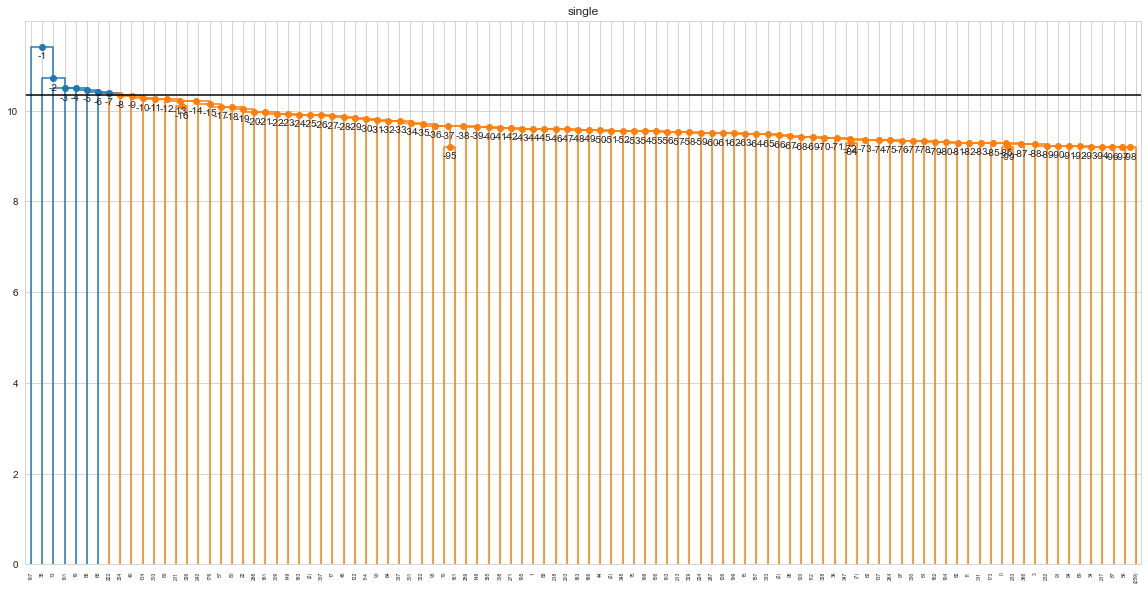

Text(0.5, 1.0, 'average')

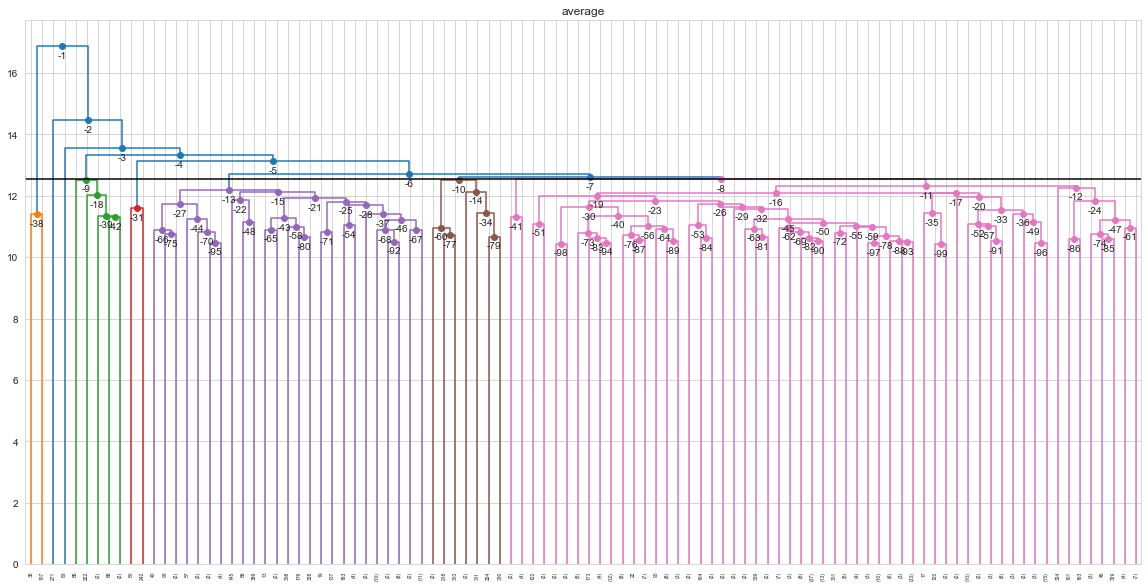

Text(0.5, 1.0, 'complete')

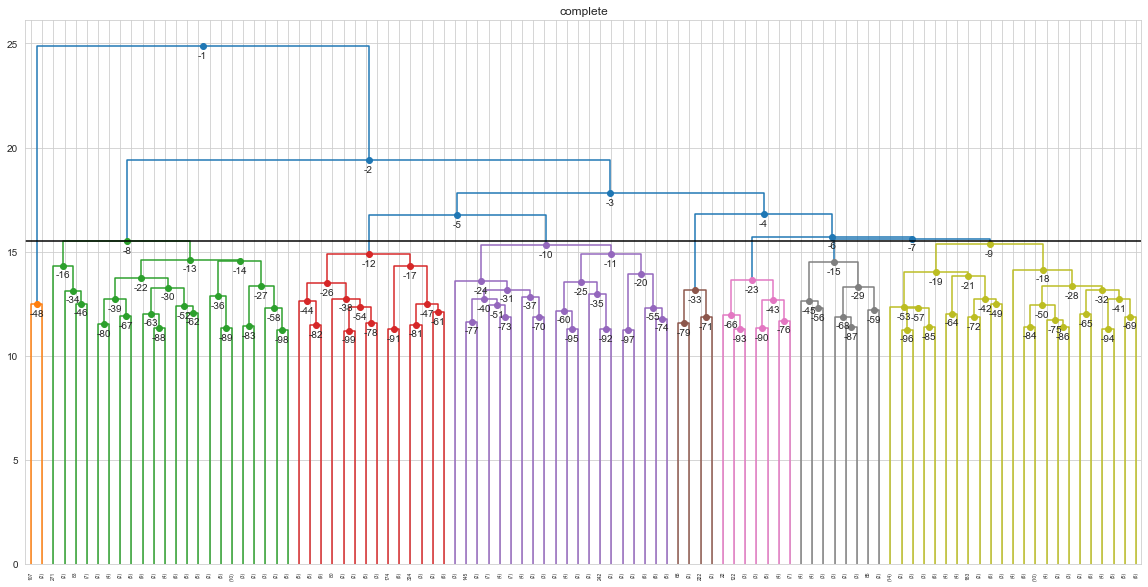

Text(0.5, 1.0, 'centroid')

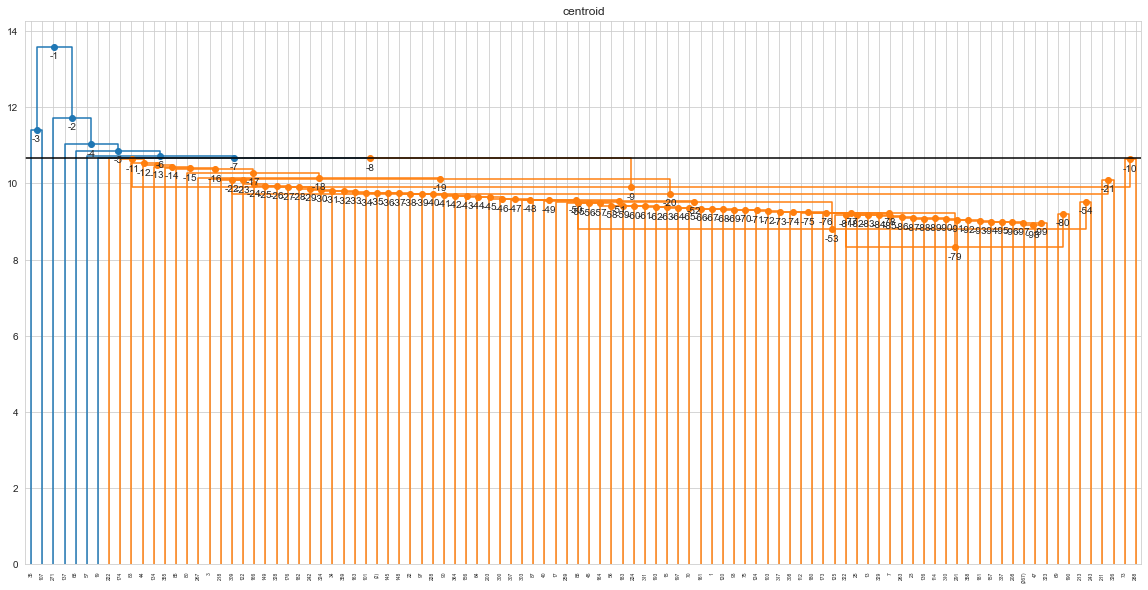

Text(0.5, 1.0, 'ward')

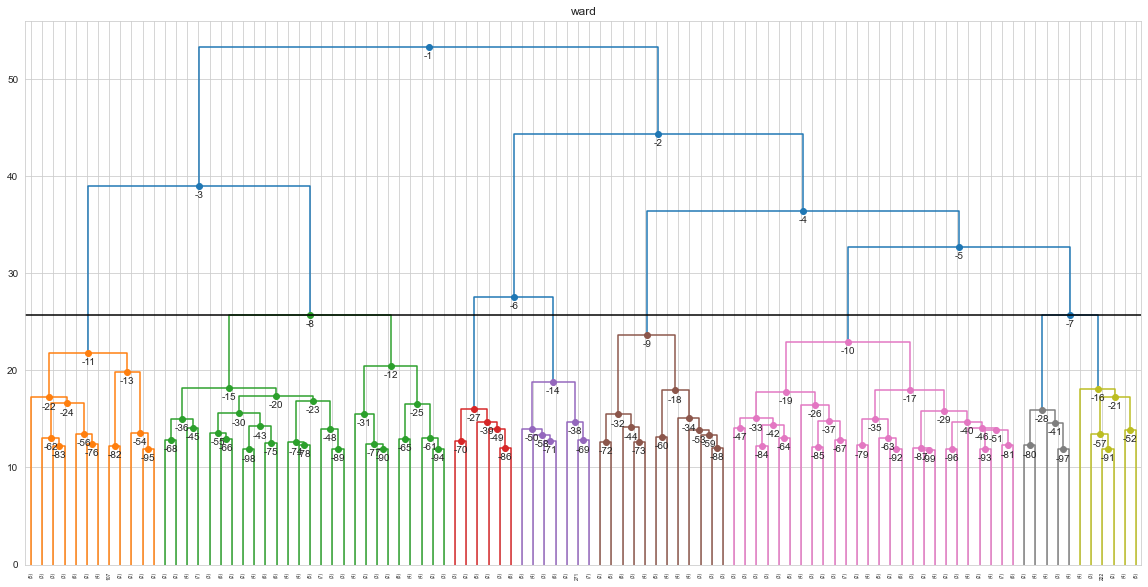

In [20]:
# Hierarchical clustering
methods = ['single', 'average', 'complete', 'centroid', 'ward']

for method in methods:
    Z = linkage(train, metric = 'euclidean', method = method)
    fig, ax = plot_dendrogram(Z = Z, X = train, truncate_mode = 'lastp', 
                              p = 100, n_clusters = 8)
    ax.set_title(method)
    plt.show()
    
        

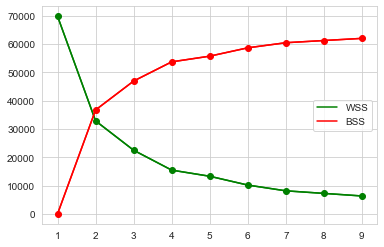

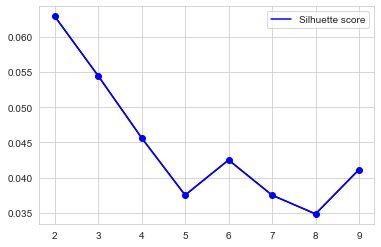

Silhouette_score:  0.027419537757866163
Correlation:  0.48279465510013936
Purity:  0.37602179827171467


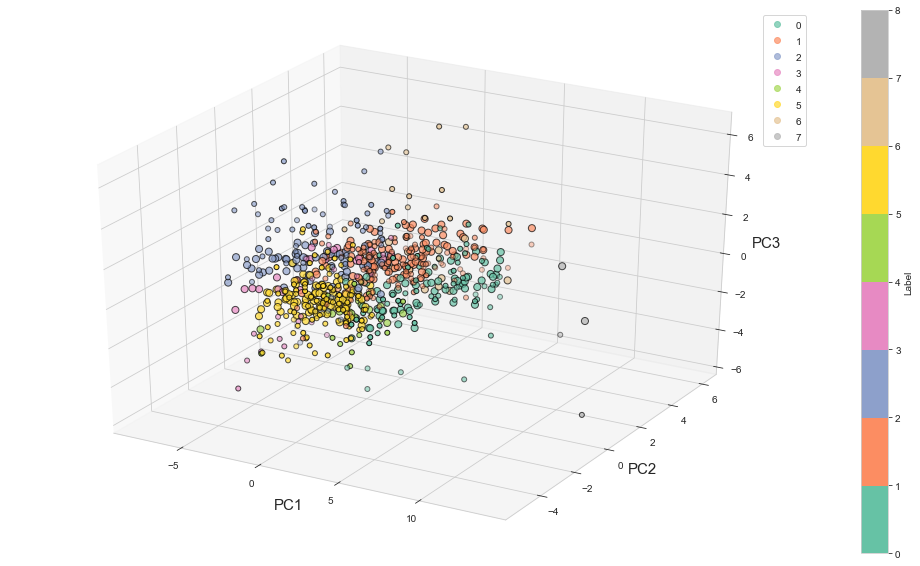

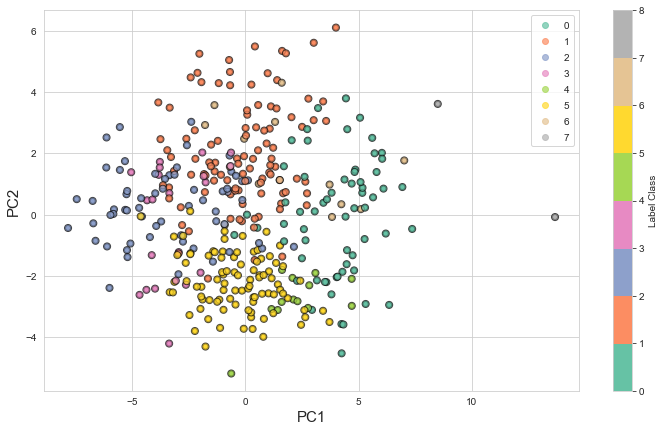

In [21]:
from sklearn.cluster import AgglomerativeClustering
distance_threshold= None 
models_AG = []
similarity = ["cosine", "euclidean", "cityblock"] # affinity = j, linkage = 'complete'
for i in clus_list:
    models_AG.append(AgglomerativeClustering(n_clusters = i, 
                                             distance_threshold = distance_threshold, 
                                             affinity = "cosine", linkage = 'complete'))
    
plotMetrics(principalComp, models_AG, metric="cosine")


n_clusters = 8
agg = AgglomerativeClustering(n_clusters = n_clusters, 
                                distance_threshold = distance_threshold, 
                                affinity = "cityblock", linkage = 'complete')

y_predict_agg = agg.fit_predict(train)
plotPCA(y_predict_agg, pc_plot, clustering = True)
plot2dPCA(y_predict_agg, pc_plot.PC1, pc_plot.PC2, clustering = True)

print("Silhouette_score: ", silhouette_score(train, y_predict_agg, metric = 'euclidean'))
print("Correlation: ", correlation(train, y_predict_agg , "euclidean"))
print('Purity: ', tot_purity(y_predict_agg, codedLabel))

## Features Selection

Machine Learning algorithms do not work very well in high dimensional spaces, so it always a good practice to performe a feature selection. In simple words the aim of features selection is to find the most important features, where most important means the features capable of giving us the information we need, in order to solve the problems we are facing. In this case we will performe the feature selection in order to achieve better result in the classification of our sample as well as speeds up the training time of the model. In particular, we will use the *Recursive Features Elimination* a method implemented in the *scikit-learn* **API**. This method is very similar to the *Backwards Feature Selection*. It starts with all the features and then for every iteration the worst *x* number of features (i.e the features which have the *lowest* feature importances according to a *k-fold cross validation* performed on the model selected fitted with the features we are considering) are eliminated using the "step" parameter till "n_features" are left. In this example we will use as metrics the accuracy and a SVM as model to compare the scores. 

We can plot the score obtained for number of features as shown below. We can see that the best number of features according to the cross validation on the SMV is 11 and are the following:

* **DYRK1A** <- overexpressed in trisomy 21 subjects
* **NR2A**  <- overexpressed in trisomy 21 subjects
* **pCAMKII** <- overexpressed in ts65dn mouse
* **pERK**  <- activation of the PERK pathway in Ts65Dn
* **BRAF** <- interact with DYRK1A extending the kinetics of ERK
* **DSCR1** <- overexpressed in brains of Down Syndrom patients
* **AMPKA** <- involved in Down syndrome cell adhesion molecule
* **NUMB** <- play a role in the Alzheimer’s disease
* **pPKCG** <- influenced by mementin 
* **BAX** <- upregulated in Down Syndrom patients
* **Tau** <- mutation in Down Syndrom patients 

As we can notice this list contain's the proteins, except for **SOD1_N** which was dropped, that we have "classified" as most correlated with the target classes. 

NOTE: Some features are correlated among each other but according to some "experiment" conducted  during the creation of this notebook removing the correlated features bring to have lowest accuracy score, this is due to the fact that those proteins works together as shown is some published papers that we can find online. 

Optimal number of features : 11


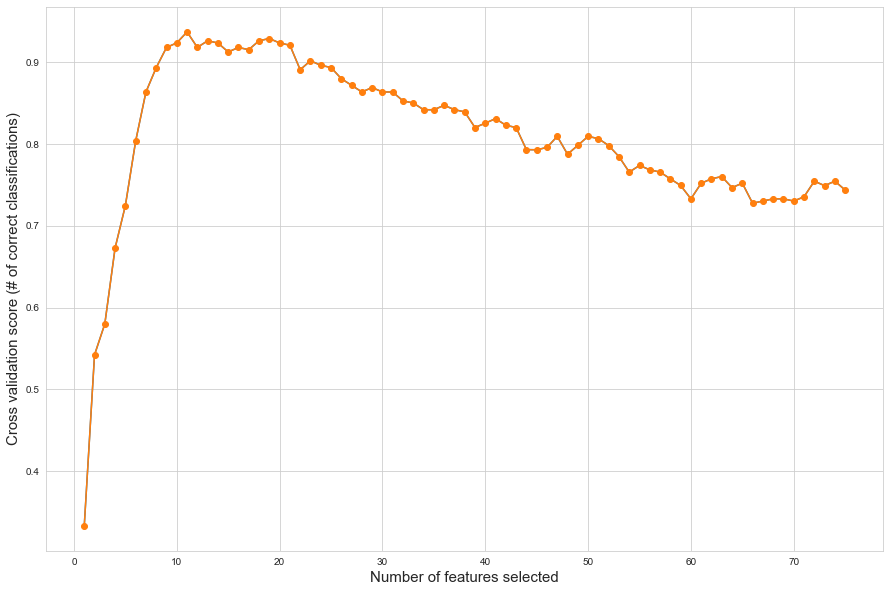

In [22]:
rfecv = selectFeatures(train, codedLabel)

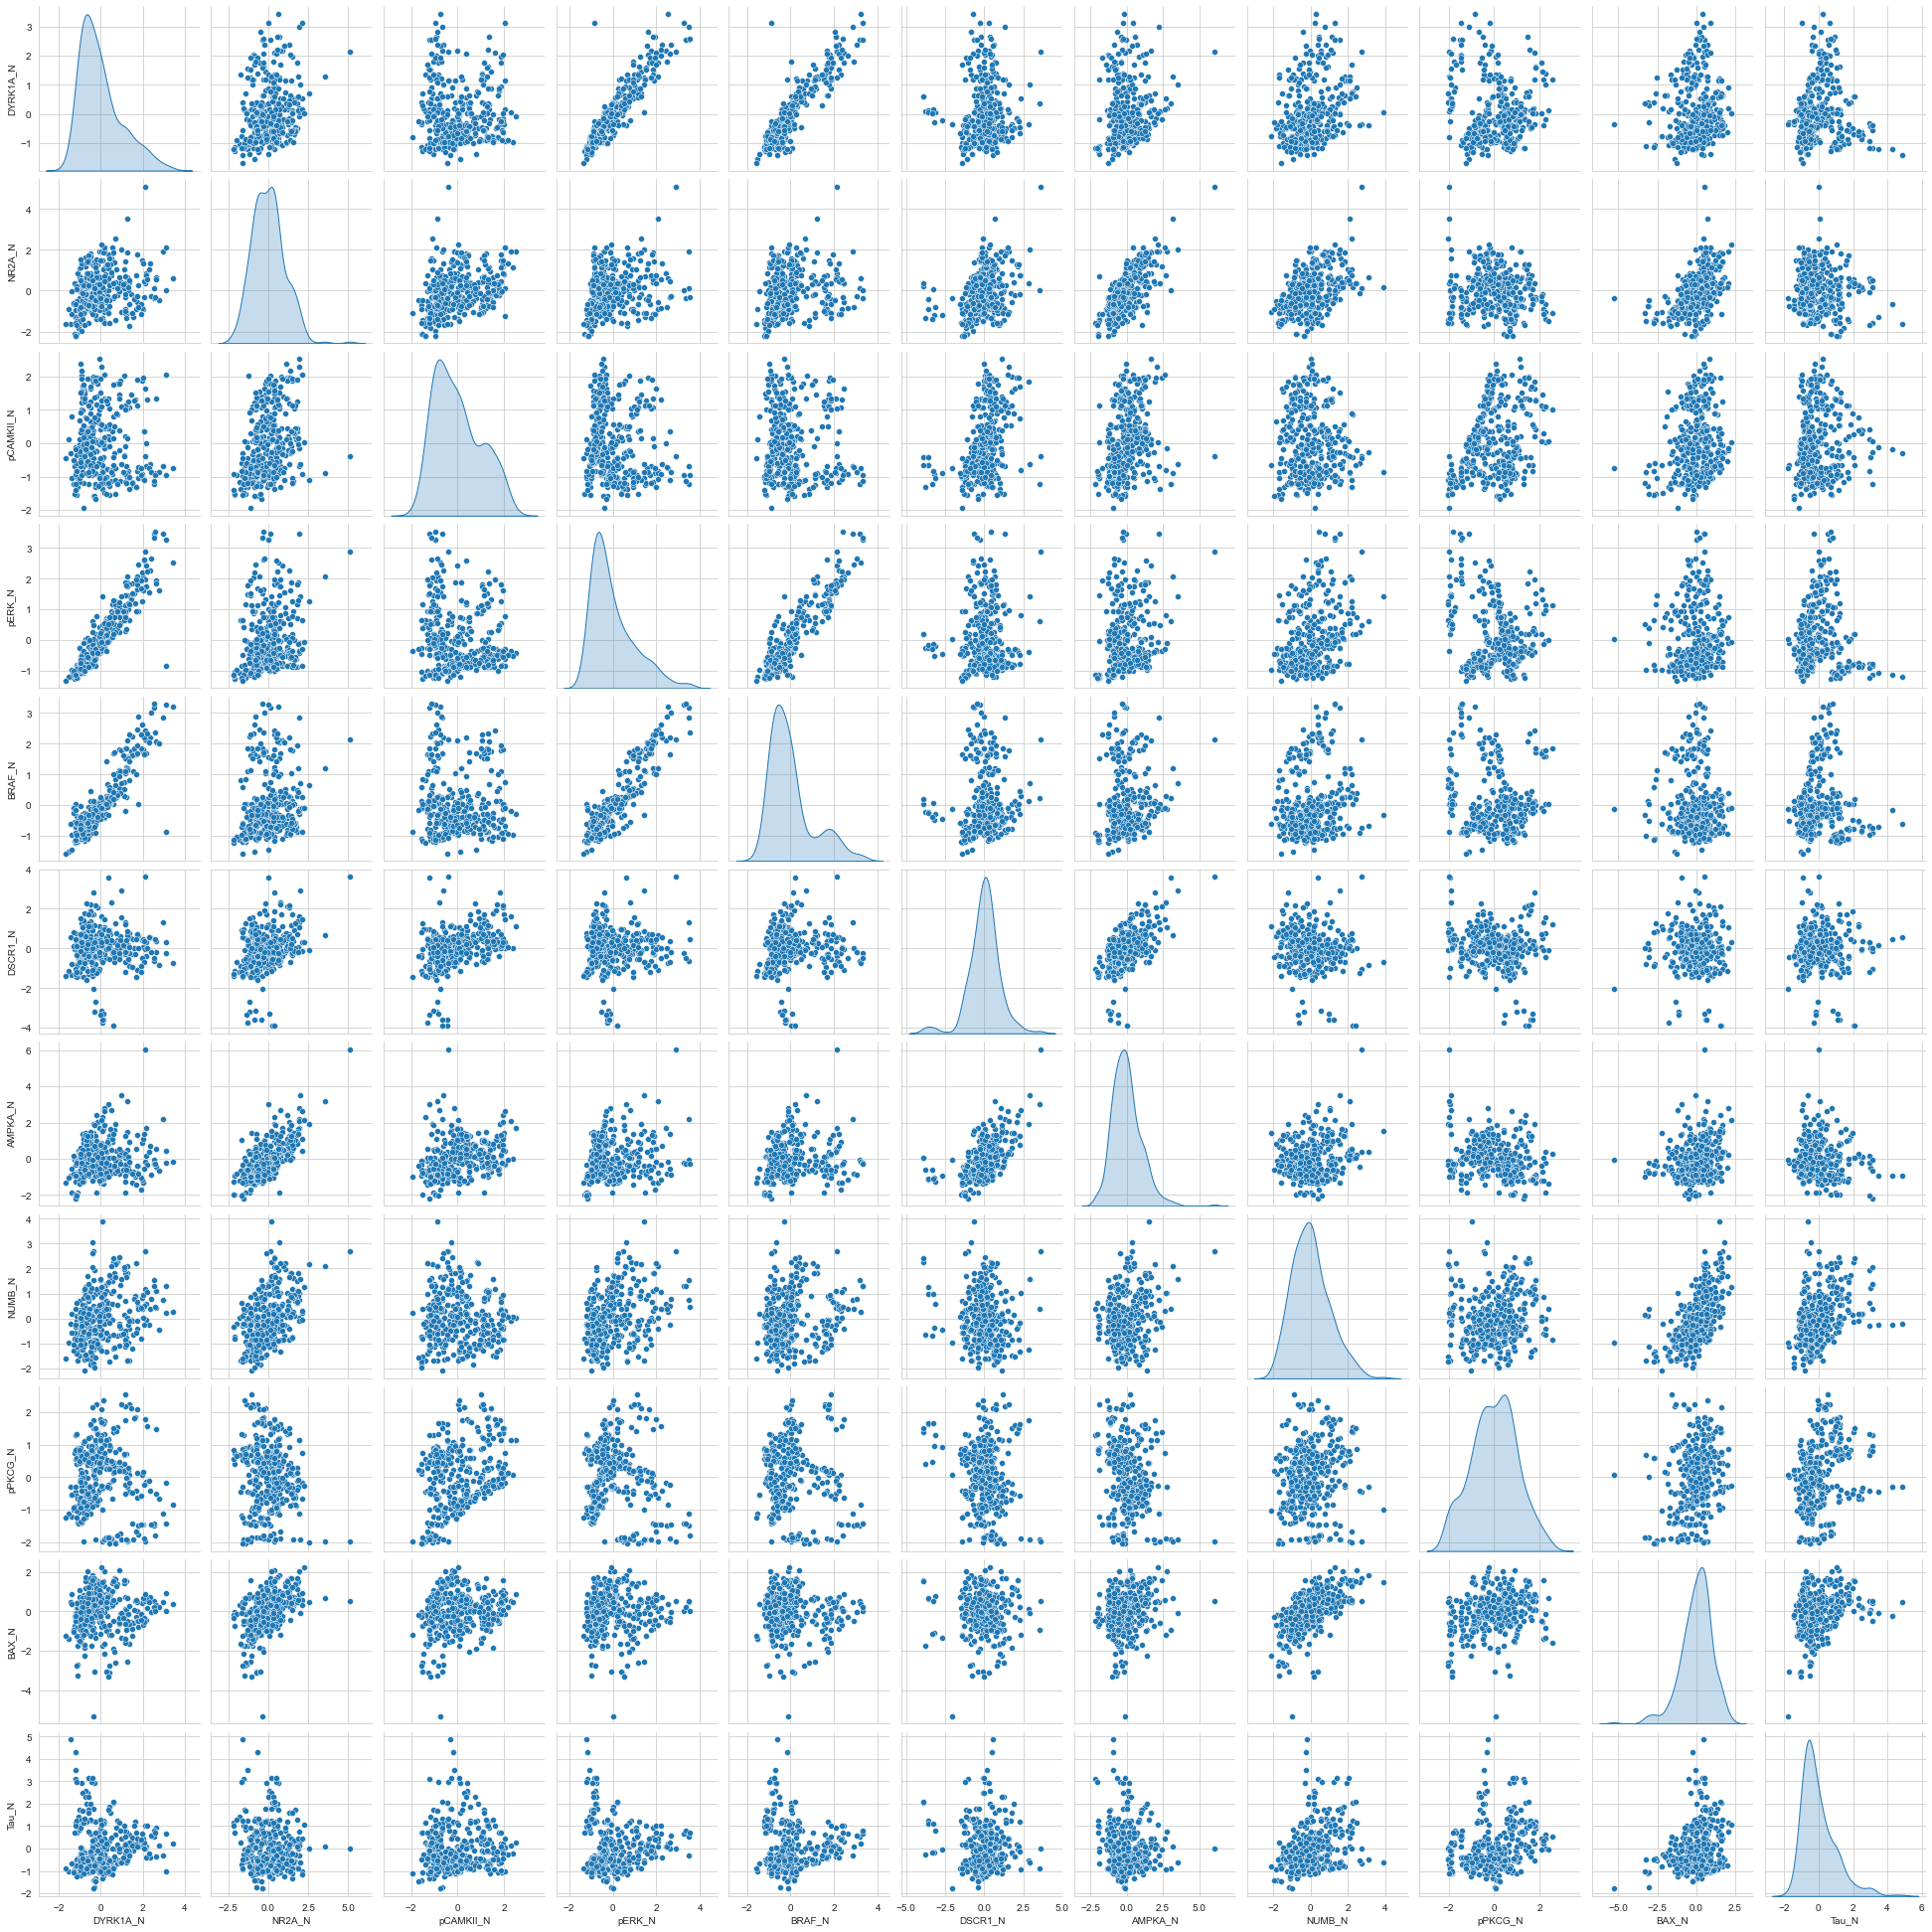

In [23]:
selectedTrain = train[train.columns[rfecv.get_support()]]
_ = sns.pairplot(selectedTrain, diag_kind = "kde")

# Classification

In this section we will select our model among the following:
* KNN 
* Logistic Regression
* Linear Discriminant Analysis
* Quadratic Discriminant Analysis
* Support Vector Machines 


     
In particular it is used the k-folds cross validation with $k = 10$ because has been demonstrated that is a good
compromise between accuracy and performance. So we will split our dataset in 10 subset and we will repeat the training and testing procedure 10 times. At each time we will select one subset as test and we will train our model on the remaining $k - 1$ models using as a score the *accuracy*. This procedure is implemented in the *cross_val_score* function of the *scikit-learn* **API**. 

Then we will try to tune the hyperparameters of the two models with the highest cross validation score. After that we will use the test set to have a look of how the model performs on new data using the test set.

Note: 
The *accuracy* is calculated as follow:
\begin{equation} \label{eq:accuracy}
  accuracy = \frac{number \; of \; incorrect \; prediction}{Total \; number \; of \; prediction} 
\end{equation}




### Model selection
We can notice that all four models get good results  even without a hyperparameters tuning. 

The worst results is obtained by LDA. This is due to the fact that LDA makes very strong assumption on the distribution of the data and also assume same variance for all the classes. The second worst results is obtained by KNN. We have to remember that we are working on a 11th dimensional features space and so this could be the reasons of the "low" score obtained by KNN and also because almost surely k = 5 is not the best hyperparameter for the KNN on this dataset. 

Anyway the models that get the highest scores are:
* SVM maybe because robust to outlier and because the boundary is decided by just few points.
* QDA maybe because dropping the assumption of the same variance and so increasing the flexibility compared to LDA make a huge difference in this dataset.


So we will choose this two models for the hyperparameters tuning in order to try to further improve the performance of this two models. 

In [24]:
classifiers = {"5 Nearest Neighbors": KNeighborsClassifier(5), 
               "Logistic Regression" : LogisticRegression(),
               "LDA":  LDA(), "QDA": QDA(), "SVM linear": SVC(kernel = "linear")}

modelScore = {}

for name, model in classifiers.items():
    print("Name: ", name)
    score = cross_val_score(model, selectedTrain, codedLabel, scoring = 'accuracy', cv = 10, n_jobs=-1)
    print("Mean Score: ", score.mean(), "\n")
    modelScore = {name : score.mean()}
    modelScore.update(modelScore)

Name:  5 Nearest Neighbors
Mean Score:  0.8825825825825826 

Name:  Logistic Regression
Mean Score:  0.8747747747747748 

Name:  LDA
Mean Score:  0.8392642642642644 

Name:  QDA
Mean Score:  0.9538288288288287 

Name:  SVM linear
Mean Score:  0.9346096096096096 



### Hyperparameters tuning
The hyperparameter for the QDA is:
* reg_param that regularizes the covariance estimate according to the following formula
 
\begin{equation} \label{eq:tuning}
   (1 - \alpha) * \Sigma + \alpha * I_{n}
\end{equation}

where:
* $ \alpha $ is the regulatization parameter
* $ \Sigma $ is the covariance matrix 
* *I* is the identity matrix
* *n* is the number of features 


While the hyperparameters for the SVM are:
* C that tells the SVM optimization how much you want to avoid misclassifying each training example
* gamma  is the free parameter of the Gaussian radial basis function
* kernel is the type of kernel to map the point in the new space
* degree is the degree of the polynomial kernel 




Note: 
* the small C the bigger the margin 

* Just few words on gamma hyperparameter because it is the kernel that we will use. A small gamma means a Gaussian with a large variance so the influence of $x'$ is more, i.e. if $x'$ is a support vector, a small gamma implies the class of this support vector will have influence on deciding the class of the vector $x$ even if the distance between them is large. If gamma is large, then variance is small implying the support vector does not have wide-spread influence. Technically speaking, large gamma leads to high bias and low variance models, and vice-versa.

\begin{equation} \label{eq:svm}
  K(x, x') = exp(- \gamma || x - x'||^2)
\end{equation}
 


Note: "Unfortunately" the model that has get the best results is the SVM so there is no an easy way to interpret this model, for this reason we have to sacrifice the interpretability in order to get an high classicication accuracy. 



In [25]:
param_gridQDA = [{'reg_param': [0.1, 0.2, 0.3, 0.4, 0.5]}]

gridSerarchQDA = GridSearchCV(QDA(), param_grid = param_gridQDA, 
                              return_train_score = True, 
                              cv = 10).fit(selectedTrain, codedLabel) #
bestModelQDA = gridSerarchQDA.best_estimator_
print('The cross val scor for the QDA is: ', 
     cross_val_score(bestModelQDA, selectedTrain, 
                     codedLabel, scoring = 'accuracy', cv = 10).mean())


param_gridSVM = {'C': [0.1, 1, 10, 100],  
                 'gamma': [1, 0.1, 0.01, 0.001], 
                 'kernel': ['poly', 'rbf', 'sigmoid', 'linear'],
                 'degree': range(1, 4)} 
            
gridSerarchSVM = GridSearchCV(SVC(probability = True), 
                              param_grid = param_gridSVM, 
                              return_train_score = True, 
                              cv = 10).fit(selectedTrain, codedLabel) 


bestModelSVM = gridSerarchSVM.best_estimator_
print('The cross val scor for the SVM is: ', 
      cross_val_score(bestModelSVM, selectedTrain, codedLabel, 
                      scoring = 'accuracy', cv = 10).mean())

The cross val scor for the QDA is:  0.9428678678678679
The cross val scor for the SVM is:  0.9645645645645645


We can see that in the end the SVM reach the highest accuracy on the test. So the model that we choose is the SVM. 
We can also see the values for the precision, the recall and the f1-score for the test.

We can notice that the average precision in 0.98 and a recall of 0.98. The most common error are:

* t-SC-s mice are classified as c-SC-s
* t-SC-s mice are classified as t-CS-s
* t-SC-s mice are classified as c-CS-s


For this reason the **t-SC-s** gets the lowest recall score, but it has the highest possible precision. In other words if the classifier says that the sample is a t-SC-s mouse it is correct with a probability of 1, but if our sample is a t-SC-s mouse it will be classified correctly with a probability of 0.84. 

On the contrary for the  **t-CS-s** class. If our cassifier says that a sample is t-SC-m mouse this is true only with probability of 0.92, but if our sample is a t-CS-s mouse it will be classified correctly with a probability of 1.

In [26]:
test = pd.read_csv("Data/test.csv")
test['class']  = le.fit_transform(test['class'])
coded_y = test.pop('class')

test = pd.DataFrame(standard_scaler.transform(test), columns = test.columns)
test = test[train.columns[rfecv.get_support()]]

In [27]:
bestModelQDA.fit(selectedTrain, codedLabel)
bestModelSVM.fit(selectedTrain, codedLabel)
print('\nTest score: ', np.round(bestModelQDA.score(test, coded_y), decimals = 2))
print('Test score: ', np.round(bestModelSVM.score(test, coded_y), decimals = 2))

QuadraticDiscriminantAnalysis(reg_param=0.1)

SVC(C=10, degree=1, gamma=0.1, probability=True)


Test score:  0.96
Test score:  0.98


In [28]:
print(classification_report(coded_y, bestModelSVM.predict(test), target_names = set(labelClass)))

              precision    recall  f1-score   support

      c-SC-m       1.00      1.00      1.00        24
      t-SC-m       1.00      1.00      1.00        27
      t-CS-s       1.00      0.84      0.92        32
      c-CS-m       0.94      1.00      0.97        30
      t-CS-m       1.00      1.00      1.00        33
      c-CS-s       1.00      1.00      1.00        33
      c-SC-s       0.92      1.00      0.96        22
      t-SC-s       0.98      1.00      0.99        44

    accuracy                           0.98       245
   macro avg       0.98      0.98      0.98       245
weighted avg       0.98      0.98      0.98       245



Confusion matrix TEST


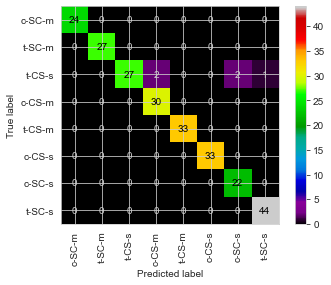

In [29]:
print('Confusion matrix TEST')
_ = plot_confusion_matrix(bestModelSVM, test, coded_y, 
                      display_labels=set(labelClass), xticks_rotation='90', cmap = 'nipy_spectral')

An approximation in 2D of the boudary using the first two principal components is shown below. As we analyze in the preliminary analysis this is not very informative but it can be nice to visualize graphically the "result" of the work that we have done. 
This is due to the fact that the boundary is a 10D surface in a complex 11D space. This surface is then projected using the kernel function of the SVM in the original 11D space and then reprojected in a 2D space using the first two principal components.

SVC(C=10, degree=1, gamma=0.1)

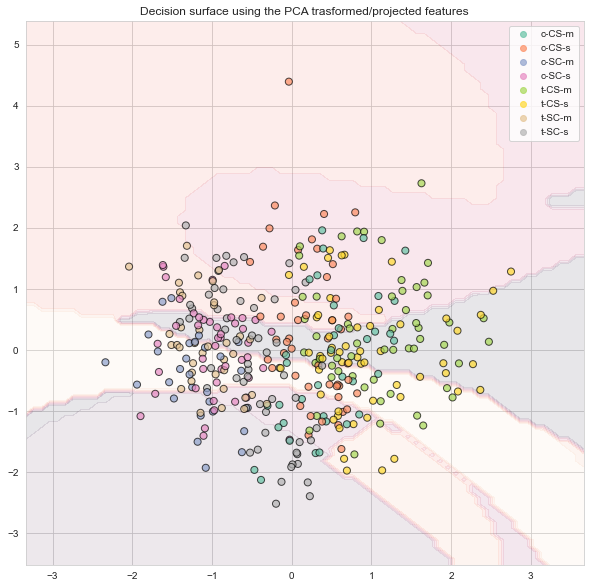

In [30]:
train_pc1_coords = principalComp[:, 0]
train_pc2_coords = principalComp[:, 1]

sc = standard_scaler.fit(np.column_stack((train_pc1_coords, train_pc2_coords)))
pca_train = sc.transform(np.column_stack((train_pc1_coords, train_pc2_coords)))


clf_svm = SVC(C = bestModelSVM.C, gamma = bestModelSVM.gamma,
              kernel = bestModelSVM.kernel, degree= bestModelSVM.degree)
clf_svm.fit(pca_train, codedLabel)

pca = PCA()
x_test_pca = pca.fit_transform(pca_train)

test_pc1_coords = x_test_pca[:, 0]
test_pc2_coords = x_test_pca[:, 1]


x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start = x_min, stop = x_max, step= 0.1), 
                     np.arange(start = y_min, stop = y_max, step= 0.1))

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

plotBoundary(xx, yy, Z, test_pc1_coords, test_pc2_coords, codedLabel)

## Regression 
For the regression part we will first scale our data using the *RobustScaler()* function provided by *scikit-learn* **API**. This because dataset contains very noisy data and this will influence a lot out regression. 
Robust scaler operates according to the following formula:


\begin{equation} \label{eq:robustScaler}
    x_{i} = \frac{x_{i} – \mu} {Q_{3} – Q_{1}}
\end{equation}


where:
* $\mu$ is the median
* $Q_{1}$ is the 25th percentile also known as first quartile
* $Q_{3}$ is the 75th percentile also known as third quartile 


Then we will use the *QuantileTransformer()* function to map the probability distribution of our data to a uniform or a normal distribution. This is done because for a given features, this transformation tends to spread out the most frequent values and this gave less importance to the outliers.

After that we plot the three most correleted features to the target and the residuals. We can see that even if we have done a quite strong preprocessing the residuals do not seem so "good". So we will then try to apply a monotonic trasformation, in particular a square root to make our data more linear. To select the features we first detect and drop the most correleted one, then we use the *SelectKBest* function of the *scikit-learn*  **API** using as metrics the *f_regression*


In particular the f_regression is a sort of implementation of the F-test and it has two steps:
* First is computed the correlation betweeneach regressor and the target
* Second this correlation is converted to an F score then to a p-value.

We plot the p-values in ascending order to see what are the features that are most correlated.
As we can see a good subset of features gets a very low p-values so in order to select the best k number of features we perform a *SelectKBest* for each value of k. According to this procedure the number of features selected are 18. In order to create our regression model we split our dataset in traning and validation. We will compare:
* Linear regression 
* Ridge regression 
* Lasso regression 
* Polynomial (2th order) with only interaction terms (synergy)
* Polynomial (2th order)

In particular it is notable to underline that we are going to use a sort of ridge polynomial regression, why this because with a tuning parameter equal to 1 is just a normal polynomial regression but changing this parameter we can get some sort of regularization and this can be useful when there are a lot of noice in particular with models that have more variance. Performing the usual k-fold cross validation using this time the $R^2$ as scoring we end up having as best parameter the polynomial regression with only interaction term. 

Unfortunately the performace of this regressor are not very good and so our predictions will not be accurate.

In [31]:
trainRG = pd.read_csv("Data/train.csv").drop(columns = 'class', axis = 1)

In [32]:
from sklearn.preprocessing import QuantileTransformer
scaler = RobustScaler().fit(trainRG)
trainRG = pd.DataFrame(scaler.transform(trainRG), columns = trainRG.columns)

qt = QuantileTransformer(n_quantiles=100, random_state=0)
trainRG = pd.DataFrame(qt.fit_transform(trainRG), columns = trainRG.columns)

y = trainRG['SOD1_N']
print('Inizial shape of train: ', trainRG.shape)

Inizial shape of train:  (367, 76)


0.6196201624078466

The most relevant features are: 
DYRK1A_N
pERK_N
MTOR_N


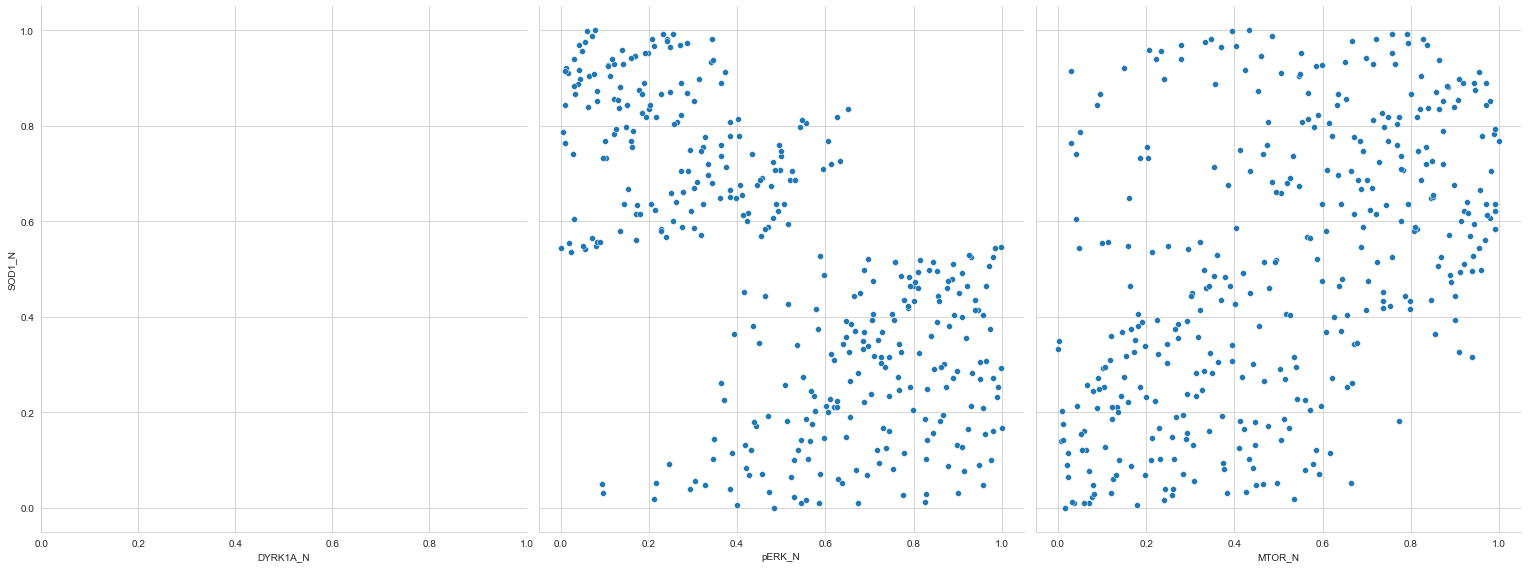

In [33]:
corrMatReg = trainRG.corr()
# Correlation with the output variable
cor_target = abs(corrMatReg['SOD1_N']).drop('SOD1_N')
# Selecting the highly correlated features
relevant_features_2 = cor_target[cor_target > 0.45]

max(relevant_features_2)
print('The most relevant features are: ') 
_ =[print (x) for x in relevant_features_2.index]

sns.pairplot(trainRG, x_vars = relevant_features_2.index, 
             y_vars = 'SOD1_N', size = 8, aspect = .9) 

In [34]:
corrMatReg = trainRG.corr()
upper = corrMatReg.where(np.triu(np.ones(corrMatReg.shape), k = 1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.70
to_drop_prov = [column for column in upper.columns if any(abs(upper[column]) > 0.70)]
to_drop = []

for x in to_drop_prov:
    if x not in relevant_features_2.index:
        to_drop.append(x)
        
to_drop       
trainRG = trainRG.drop(columns = to_drop, axis = 1)

['NR2A_N', 'BRAF_N', 'ERK_N', 'Bcatenin_N', 'AMPKA_N']

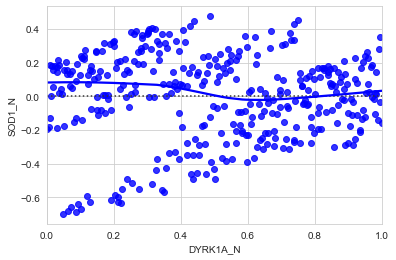

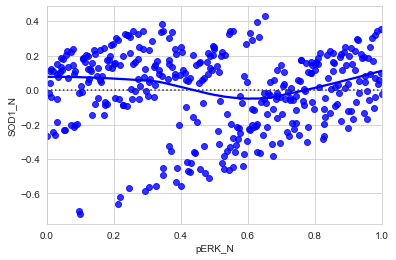

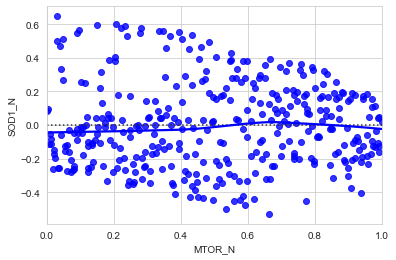

In [35]:
#Plottiamo i residui
for column in relevant_features_2.index:
    sns.residplot(trainRG[column], y, lowess=True, color="b", order=1)
    plt.show()

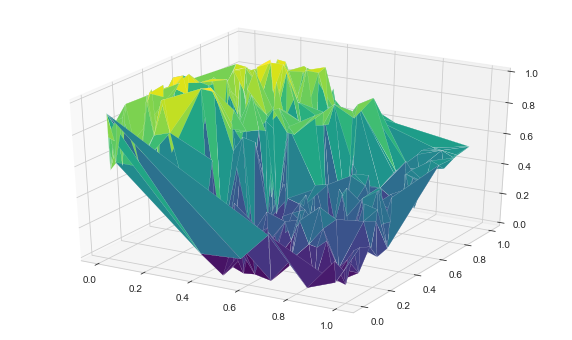

In [36]:
#RIVEDERE QUESTO PRIMA DI INSERIRLO NELLA COSA FINALE
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
ax.plot_trisurf(trainRG['pERK_N'], trainRG['MTOR_N'], y, cmap = plt.cm.viridis, linewidth = 0.1)
plt.show()

In [37]:
trainRG.drop(columns = 'SOD1_N', axis = 1, inplace = True)

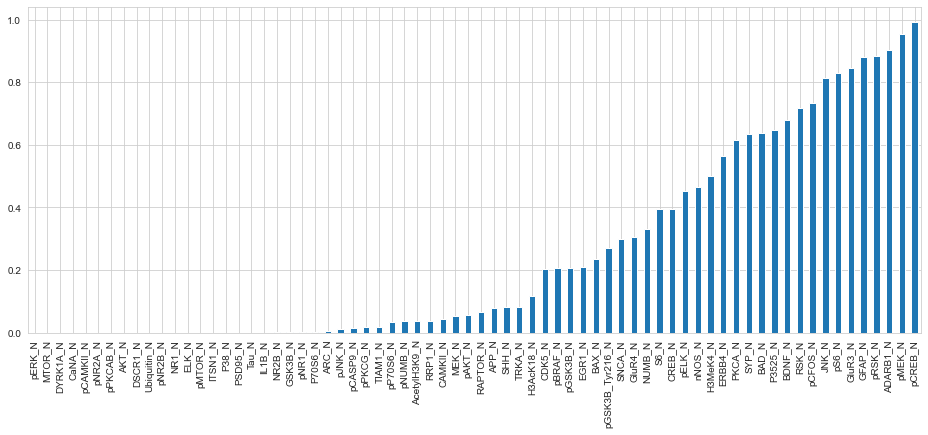

In [38]:
sel = f_regression(trainRG, y)
# first dimension F score
# second dimension p value 
p_values = pd.Series(sel[1], name = 'p_val')
p_values.index = trainRG.columns
p_values_sort = p_values.sort_values() # potrei plottarew i p value
p_values_sort.plot.bar(figsize = (16, 6))

In [39]:
trainRG = np.sqrt(trainRG)

In [40]:
r2_scorer = make_scorer(r2_score, greater_is_better = True)
scoresReg = []

for k in range(1, len(trainRG.columns) + 1):
    selKBesst = SelectKBest(f_regression, k).fit(trainRG, y)
    X_new = selKBesst.transform(trainRG)
    X_new = pd.DataFrame(X_new, columns = trainRG.columns[selKBesst.get_support()])
    score =  cross_val_score(LinearRegression(), X_new, y, 
                             scoring = r2_scorer, cv = 10,).mean()
    scoresReg.append(score)


index = scoresReg.index(max(scoresReg))
index

18

In [41]:
selKBesst = SelectKBest(f_regression, index).fit(trainRG, y)
X_new = selKBesst.transform(trainRG)
X_new = pd.DataFrame(X_new, columns = trainRG.columns[selKBesst.get_support()])

In [42]:
x_train, x_validation, y_train, y_validation = train_test_split(X_new, y, 
                                                                test_size = 0.25, random_state = 100) 


scoreLin = cross_val_score(LinearRegression(), x_train,
                           y_train, scoring = r2_scorer, cv = 10)
print("Regression: ", np.round(scoreLin.mean(), 2))

scoreLasso = cross_val_score(Lasso(alpha = 0.01), x_train,
                             y_train, scoring = r2_scorer, cv = 10)
print("Lasso: ", np.round(scoreLasso.mean(),2))

scoreRidge= cross_val_score(Ridge(alpha = 0.01, solver='saga'),
                            x_train, y_train, scoring = r2_scorer, cv = 10)
print("Ridge: ", np.round(scoreRidge.mean(),2))
    
poly_int = PolynomialFeatures(degree = 2, include_bias = True, interaction_only=True).fit(x_train)
x_train_int = poly_int.transform(x_train)
x_validation_int = poly_int.transform(x_validation)

scorePol_int = cross_val_score(Ridge(alpha = 1, solver='saga'), 
                               x_train_int, y_train, scoring = r2_scorer, cv = 10)
print("Pol_inter: ", np.round(scorePol_int.mean(),2))


poly = PolynomialFeatures(degree = 2, include_bias = True, interaction_only=False).fit(x_train)
x_train_poly = poly.transform(x_train)
x_validation_poly = poly.transform(x_validation)

scorePol = cross_val_score(Ridge(alpha = 1, solver='saga'), 
                           x_train_poly, y_train, scoring = r2_scorer, cv = 10)
print("Pol: ", np.round(scorePol.mean(), 2))

Regression:  0.74
Lasso:  0.65
Ridge:  0.74
Pol_inter:  0.75
Pol:  0.75


In [43]:
reg = LinearRegression().fit(x_train, y_train)
lasso = Lasso(alpha = 0.01).fit(x_train, y_train)
ridge = Ridge(alpha = 0.01).fit(x_train, y_train)
ply_int = Ridge(alpha = 0.01, solver='saga').fit(x_train_int, y_train)
ply = LinearRegression().fit(x_train_poly, y_train)
print("Regression: ", np.round(r2_score(y_validation, reg.predict(x_validation)),2))
print("Lasso: ", np.round(r2_score(y_validation, lasso.predict(x_validation)),2))
print("Ridge: ", np.round(r2_score(y_validation, ridge.predict(x_validation)),2))
print("Poly_inter: ", np.round(r2_score(y_validation, ply_int.predict(x_validation_int)),2))
print("Poly: ", np.round(r2_score(y_validation, ply.predict(x_validation_poly)),2))

Regression:  0.69
Lasso:  0.68
Ridge:  0.69
Poly_inter:  0.72
Poly:  0.52


In [44]:
parametersLasso = {'alpha' : np.linspace(0.001, 1, 1000)}
clf_inter = GridSearchCV(Ridge(), parametersLasso)
modRidge = clf_inter.fit(x_train, y_train).best_estimator_

print("Ridge: ", np.round(r2_score(y_validation, modRidge.predict(x_validation)), 2))

Ridge:  0.7


In [45]:
parametersLasso = {'alpha' : np.linspace(0.001, 1, 1000)}
clf_inter = GridSearchCV(Ridge(), parametersLasso)
modRidgeInt = clf_inter.fit(x_train_int, y_train).best_estimator_
print("RidgeInt: ", np.round(r2_score(y_validation, modRidgeInt.predict(x_validation_int)), 2))

RidgeInt:  0.74


In [46]:
testRG = pd.read_csv("Data/test.csv").drop('class', axis = 1)
y_test = modRidgeInt.predict(poly_int.transform(testRG[X_new.columns]))

## Introducing SOD1 in Training 

The last part of the project is adding the **SOD1** protein expression in order to use it as a feature for the prediction of the target classes. Infact now that we have a regressor for the **SOD1** we can use it to predict the possible value of the **SOD1** in the test set. And so we simply add the predicted value as a new column in the test dataset. Then we train the model selected in the previous classification section but we train it now on the selected features plus the **SOD1** features. After that we test our model on the new test set.

Unfortunately the model prediction do not improve, on the contrary the performance decrease a lot,  even if the SOD1 feature is infact correlated with the target class as we saw in the preliminary analysis. A very probable reason is that even if now we have a new features that is correleted to the target the prediction that we have made for the **SOD1** feature of the test set is very inaccurate due to the fact that the regressor performance was not very good and above all very consistent. 


In [47]:
features = list(X_new.columns)
features.append('SOD1_N')

In [48]:
newTrain = pd.read_csv("Data/train.csv")
newTrain = newTrain[features]

standard_scaler_new = preprocessing.StandardScaler().fit(newTrain)
newTrain = pd.DataFrame(standard_scaler_new.transform(newTrain), columns = newTrain.columns)



testRG = pd.read_csv("Data/test.csv").drop('class', axis = 1)
testRG['SOD1_N'] = y_test
testRG = testRG[features]
testRG = pd.DataFrame(standard_scaler_new.transform(testRG), columns = testRG.columns)

bestModelSVM.fit(newTrain, codedLabel)

SVC(C=10, degree=1, gamma=0.1, probability=True)

              precision    recall  f1-score   support

      c-SC-m       0.24      0.17      0.20        24
      t-SC-m       0.39      0.96      0.55        27
      t-CS-s       0.68      0.66      0.67        32
      c-CS-m       0.91      0.67      0.77        30
      t-CS-m       0.77      0.73      0.75        33
      c-CS-s       0.77      0.70      0.73        33
      c-SC-s       0.72      0.59      0.65        22
      t-SC-s       0.69      0.45      0.55        44

    accuracy                           0.62       245
   macro avg       0.65      0.62      0.61       245
weighted avg       0.66      0.62      0.62       245

Test score:  0.62

Confusion matrix Train:


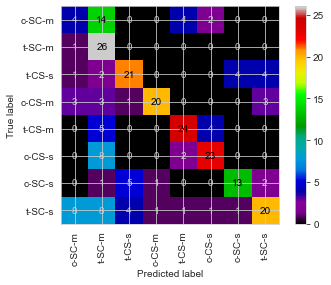

In [49]:
print(classification_report(coded_y, bestModelSVM.predict(testRG), target_names = set(labelClass)))
print('Test score: ', np.round(bestModelSVM.score(testRG, coded_y), decimals = 2))

print('\nConfusion matrix Train:')
plot_confusion_matrix(bestModelSVM, testRG, coded_y, 
                      display_labels=set(labelClass), xticks_rotation='90', cmap = 'nipy_spectral')

# Conclusion 
The analysis performed has lead to creation of a classifier that has an accuracy of 98%.
Usind the training data  has been created a regressor in order to predict the value of SOD1.
After that a new classification this time using the SOD1 feature has been performed but without the expected results.


# The END